<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_3101-3150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1249]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1250]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

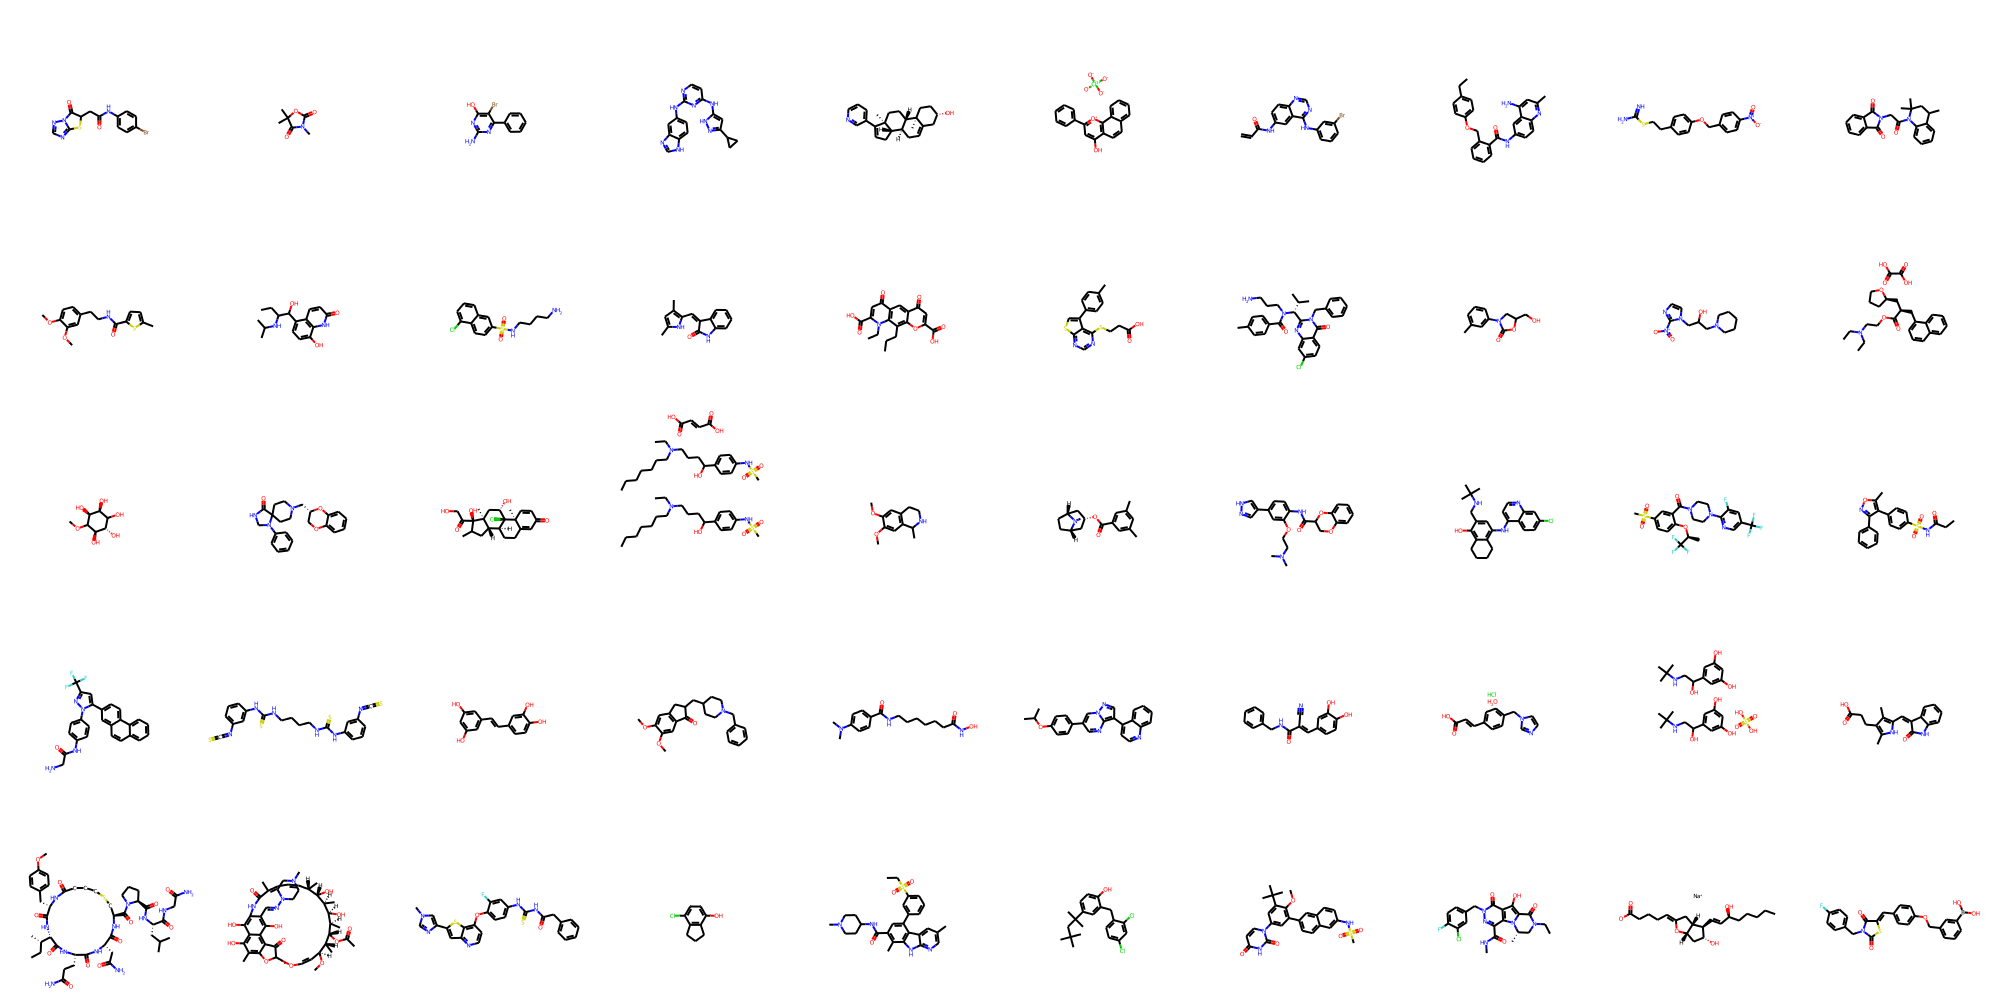

In [1251]:
smiles_list = [

'O=C(CC1Sc2ncnn2C1=O)Nc1ccc(Br)cc1',
'CN1C(=O)OC(C)(C)C1=O',
'Nc1nc(O)c(Br)c(-c2ccccc2)n1',
'c1cc(Nc2cc(C3CC3)n[nH]2)nc(Nc2ccc3[nH]cnc3c2)n1',
'C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC=C2c1cccnc1',
'Oc1cc(-c2ccccc2)[o+]c2c1ccc1ccccc12.[O-][Cl+3]([O-])([O-])[O-]',
'C=CC(=O)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1',
'CCc1ccc(OCc2ccccc2C(=O)Nc2ccc3nc(C)cc(N)c3c2)cc1',
'N=C(N)SCCc1ccc(OCc2ccc([N+](=O)[O-])cc2)cc1',
'CC1CC(C)(C)N(C(=O)CN2C(=O)c3ccccc3C2=O)c2ccccc21',
'COc1ccc(CCNC(=O)c2ccc(C)s2)cc1OC',
'CCC(NC(C)C)C(O)c1ccc(O)c2[nH]c(=O)ccc12',
'NCCCCNS(=O)(=O)c1ccc2c(Cl)cccc2c1',
'Cc1cc(C)c(/C=C2\C(=O)Nc3ccccc32)[nH]1',
'CCCc1c2oc(C(=O)O)cc(=O)c2cc2c(=O)cc(C(=O)O)n(CC)c12',
'Cc1ccc(-c2csc3ncnc(SCCC(=O)O)c23)cc1',
'Cc1ccc(C(=O)N(CCCN)[C@@H](c2nc3cc(Cl)ccc3c(=O)n2Cc2ccccc2)C(C)C)cc1',
'Cc1cccc(N2CC(CO)OC2=O)c1',
'O=[N+]([O-])c1nccn1CC(O)CN1CCCCC1',
'CCN(CC)CCOC(=O)[C@H](Cc1cccc2ccccc12)C[C@H]1CCCO1.O=C(O)C(=O)O',
'COC1[C@@H](O)[C@@H](O)C(O)[C@H](O)[C@H]1O',
'O=C1NCN(c2ccccc2)C12CCN(C[C@H]1COc3ccccc3O1)CC2',
'CC1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(Cl)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO',
'CCCCCCCN(CC)CCCC(O)c1ccc(NS(C)(=O)=O)cc1.CCCCCCCN(CC)CCCC(O)c1ccc(NS(C)(=O)=O)cc1.O=C(O)/C=C/C(=O)O',
'COc1cc2c(cc1OC)C(C)NCC2',
'Cc1cc(C)cc(C(=O)O[C@@H]2C[C@@H]3CC[C@H](C2)N3C)c1',
'CN(C)CCOc1cc(-c2cn[nH]c2)ccc1NC(=O)C1COc2ccccc2O1',
'CC(C)(C)NCc1cc(Nc2ccnc3cc(Cl)ccc23)c2c(c1O)CCCC2',
'C[C@H](Oc1ccc(S(C)(=O)=O)cc1C(=O)N1CCN(c2ncc(C(F)(F)F)cc2F)CC1)C(F)(F)F',
'CCC(=O)NS(=O)(=O)c1ccc(-c2c(-c3ccccc3)noc2C)cc1',
'NCC(=O)Nc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc3c(ccc4ccccc43)c2)cc1',
'S=C=Nc1cccc(NC(=S)NCCCCNC(=S)Nc2cccc(N=C=S)c2)c1',
'Oc1cc(O)cc(/C=C/c2ccc(O)c(O)c2)c1',
'COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2',
'CN(C)c1ccc(C(=O)NCCCCCCC(=O)NO)cc1',
'CC(C)Oc1ccc(-c2cnc3c(-c4ccnc5ccccc45)cnn3c2)cc1',
'N#C/C(=C\c1ccc(O)c(O)c1)C(=O)NCc1ccccc1',
'Cl.O.O=C(O)/C=C/c1ccc(Cn2ccnc2)cc1',
'CC(C)(C)NCC(O)c1cc(O)cc(O)c1.CC(C)(C)NCC(O)c1cc(O)cc(O)c1.O=S(=O)(O)O',
'Cc1[nH]c(/C=C2\C(=O)Nc3ccccc32)c(C)c1CCC(=O)O',
'CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(OC)cc2)NC(=O)CCCSC[C@@H](C(=O)N2CCC[C@H]2C(=O)N[C@@H](CC(C)C)C(=O)NCC(N)=O)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CCC(N)=O)NC1=O',
'CO[C@H]1/C=C\O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(/C=N/N5CCN(C)CC5)c(O)c4c3C2=O)NC(=O)/C(C)=C\C=C/[C@H](C)[C@H](O)[C@@H](C)[C@@H](O)[C@@H](C)[C@H](OC(C)=O)[C@@H]1C',
'Cn1cnc(-c2cc3nccc(Oc4ccc(NC(=S)NC(=O)Cc5ccccc5)cc4F)c3s2)c1',
'Oc1ccc(Cl)c2c1CCC2',
'CCS(=O)(=O)c1cccc(-c2cc(C(=O)NC3CCN(C)CC3)c(C)c3[nH]c4ncc(C)cc4c23)c1',
'CC(C)(C)CC(C)(C)c1ccc(O)c(Cc2ccc(Cl)cc2Cl)c1',
'COc1c(-c2ccc3cc(NS(C)(=O)=O)ccc3c2)cc(-n2ccc(=O)[nH]c2=O)cc1C(C)(C)C',
'CCN1C[C@H](C)n2c(c(O)c3c(=O)n(Cc4ccc(F)c(Cl)c4)nc(C(=O)NC)c32)C1=O',
'CCCCC[C@H](O)/C=C/[C@H]1[C@H](O)C[C@@H]2O/C(=C\CCCC(=O)[O-])C[C@@H]21.[Na+]',
'O=C1S/C(=C\c2ccc(OCc3cccc(B(O)O)c3)cc2)C(=O)N1Cc1ccc(F)cc1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



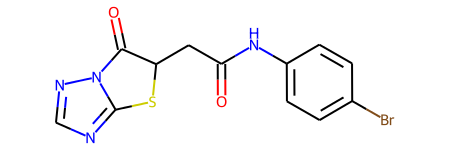

In [1252]:
M1 = mol_list [0]
M1

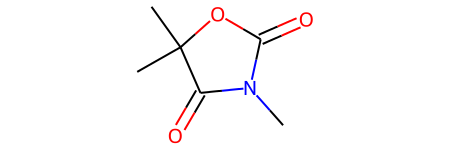

In [1253]:
M2 = mol_list [1]
M2

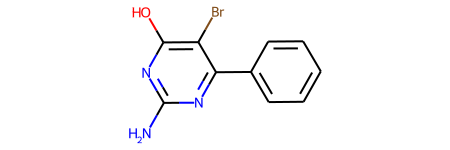

In [1254]:
M3 = mol_list [2]
M3

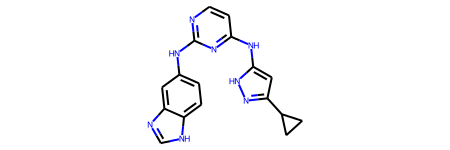

In [1255]:
M4 = mol_list [3]
M4

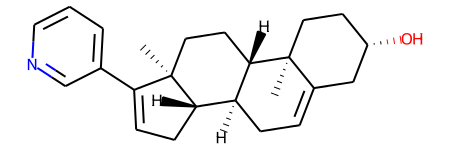

In [1256]:
M5 = mol_list [4]
M5

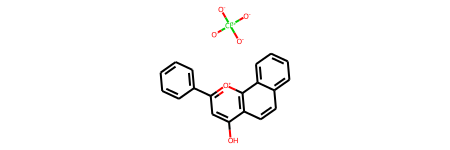

In [1257]:
M6 = mol_list [5]
M6

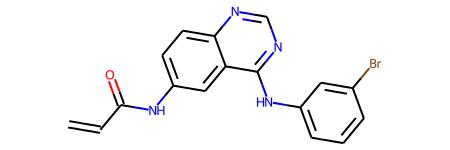

In [1258]:
M7 = mol_list [6]
M7

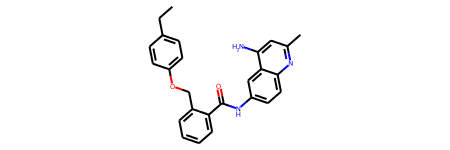

In [1259]:
M8 = mol_list [7]
M8

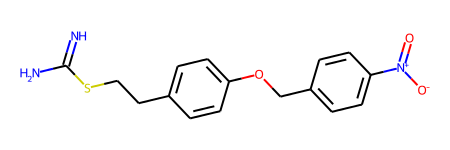

In [1260]:
M9 = mol_list [8]
M9

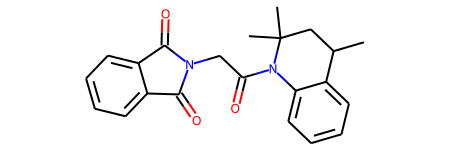

In [1261]:
M10 = mol_list [9]
M10

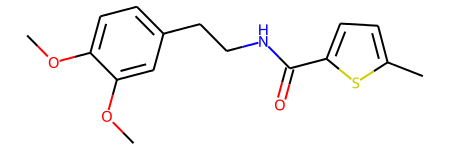

In [1262]:
M11 = mol_list [10]
M11

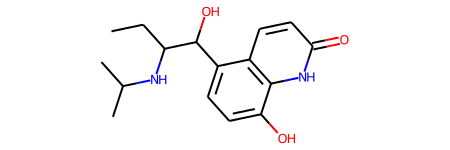

In [1263]:
M12 = mol_list [11]
M12

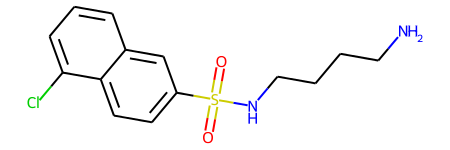

In [1264]:
M13 = mol_list [12]
M13

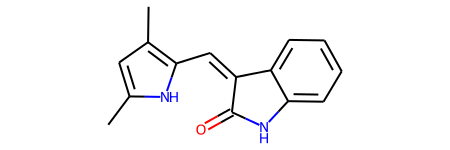

In [1265]:
M14 = mol_list [13]
M14

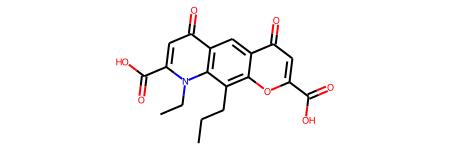

In [1266]:
M15 = mol_list [14]
M15

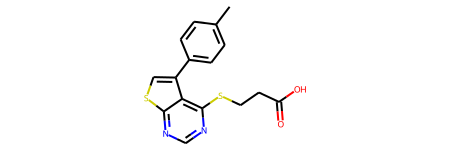

In [1267]:
M16 = mol_list [15]
M16

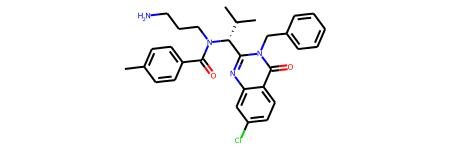

In [1268]:
M17 = mol_list [16]
M17

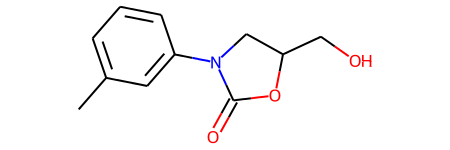

In [1269]:
M18 = mol_list [17]
M18

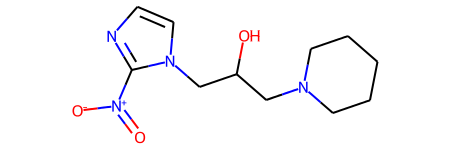

In [1270]:
M19 = mol_list [18]
M19

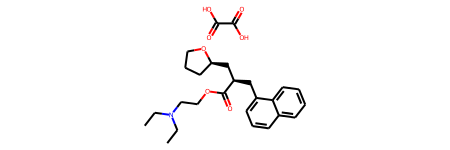

In [1271]:
M20 = mol_list [19]
M20

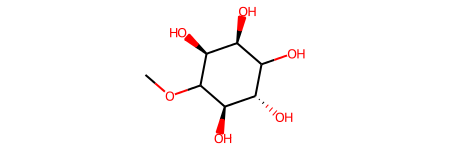

In [1272]:
M21 = mol_list [20]
M21

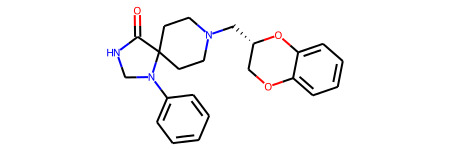

In [1273]:
M22 = mol_list [21]
M22

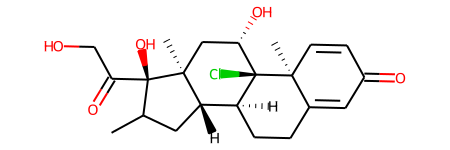

In [1274]:
M23 = mol_list [22]
M23

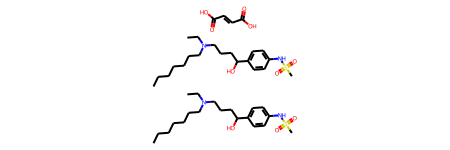

In [1275]:
M24 = mol_list [23]
M24

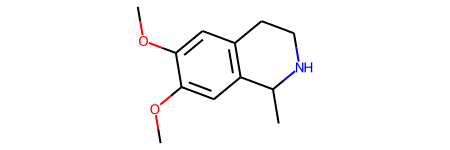

In [1276]:
M25 = mol_list [24]
M25

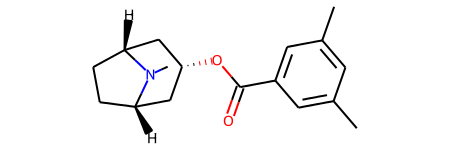

In [1277]:
M26 = mol_list [25]
M26

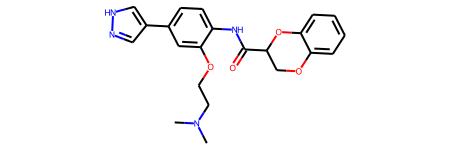

In [1278]:
M27 = mol_list [26]
M27

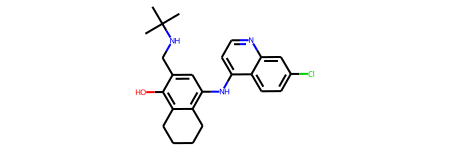

In [1279]:
M28 = mol_list [27]
M28

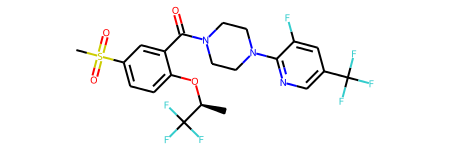

In [1280]:
M29 = mol_list [28]
M29

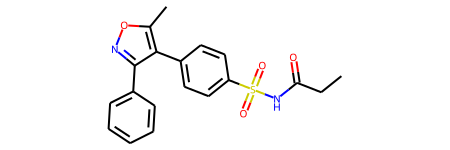

In [1281]:
M30 = mol_list [29]
M30

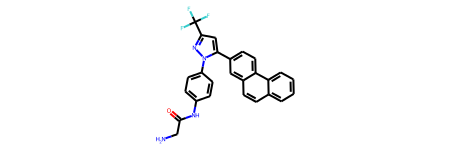

In [1282]:
M31 = mol_list [30]
M31

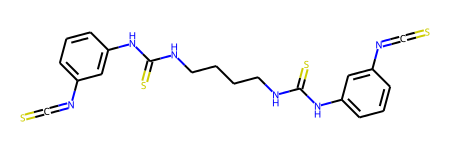

In [1283]:
M32 = mol_list [31]
M32

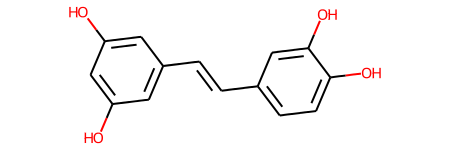

In [1284]:
M33 = mol_list [32]
M33

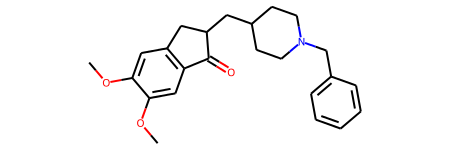

In [1285]:
M34 = mol_list [33]
M34

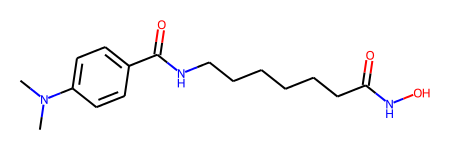

In [1286]:
M35 = mol_list [34]
M35

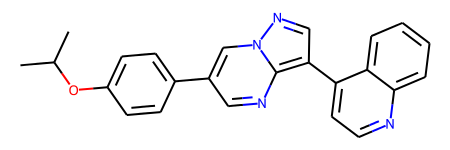

In [1287]:
M36 = mol_list [35]
M36

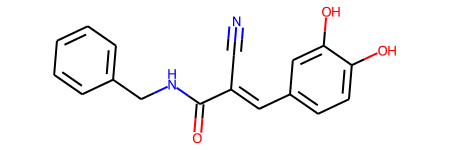

In [1288]:
M37= mol_list [36]
M37

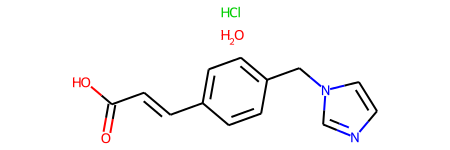

In [1289]:
M38= mol_list [37]
M38

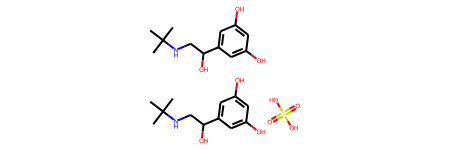

In [1290]:
M39= mol_list [38]
M39

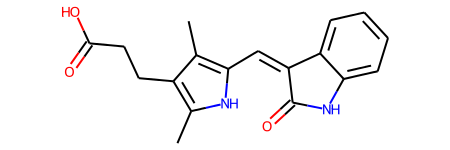

In [1291]:
M40= mol_list [39]
M40

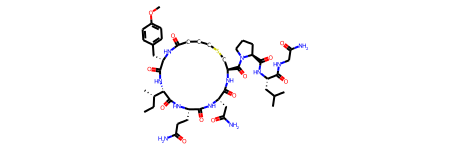

In [1292]:
M41= mol_list [40]
M41

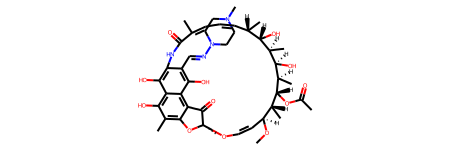

In [1293]:
M42= mol_list [41]
M42

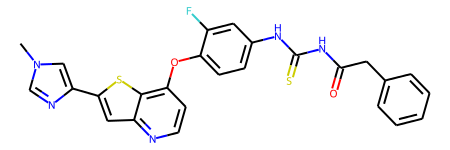

In [1294]:
M43= mol_list [42]
M43

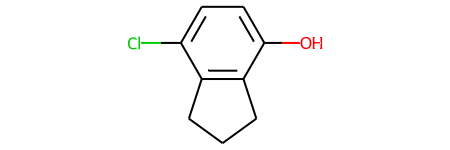

In [1295]:
M44= mol_list [43]
M44

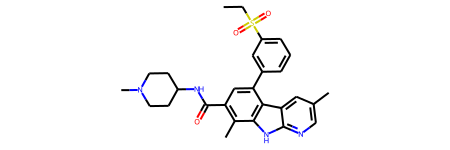

In [1296]:
M45= mol_list [44]
M45

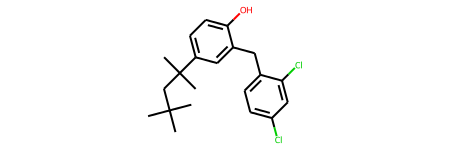

In [1297]:
M46= mol_list [45]
M46

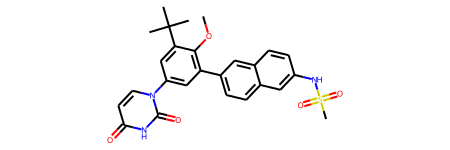

In [1298]:
M47= mol_list [46]
M47

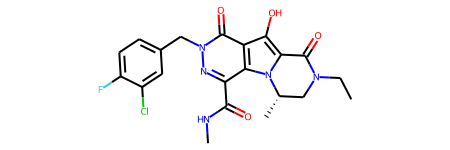

In [1299]:
M48= mol_list [47]
M48

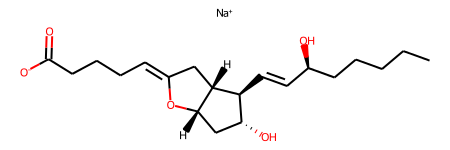

In [1300]:
M49= mol_list [48]
M49

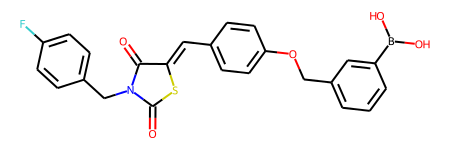

In [1301]:
M50= mol_list [49]
M50

In [1302]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[5,
 41,
 43,
 53,
 64,
 80,
 128,
 133,
 168,
 191,
 286,
 314,
 356,
 378,
 405,
 419,
 428,
 489,
 567,
 598,
 607,
 620,
 625,
 650,
 675,
 685,
 726,
 728,
 792,
 807,
 828,
 843,
 849,
 886,
 888,
 893,
 901,
 909,
 935,
 975,
 1004,
 1019]

In [1303]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[33,
 36,
 60,
 121,
 185,
 250,
 255,
 258,
 314,
 324,
 356,
 566,
 576,
 608,
 650,
 656,
 723,
 935,
 987]

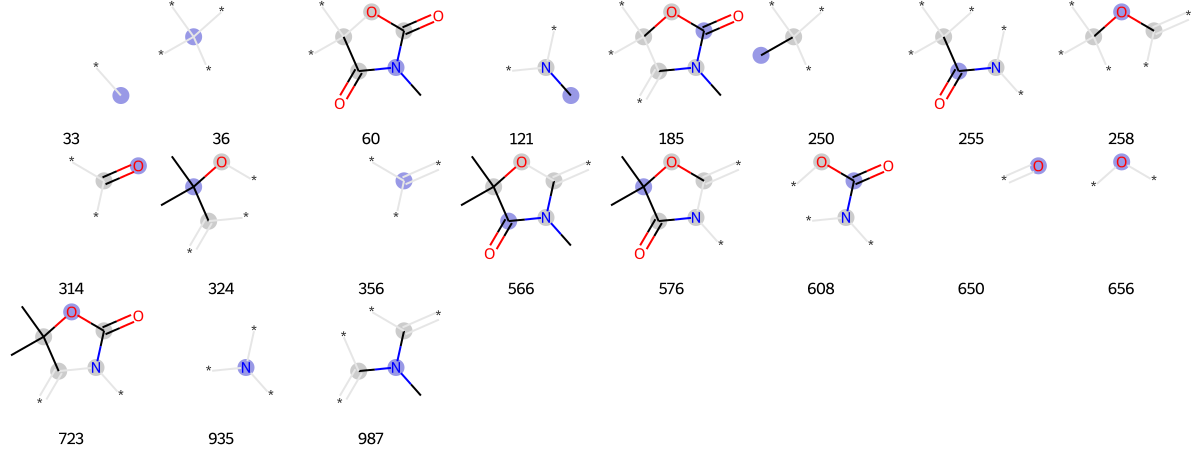

In [1304]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1305]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[50,
 64,
 106,
 136,
 147,
 175,
 216,
 323,
 356,
 378,
 389,
 407,
 409,
 433,
 434,
 471,
 578,
 607,
 676,
 726,
 728,
 736,
 766,
 807,
 831,
 849,
 867]

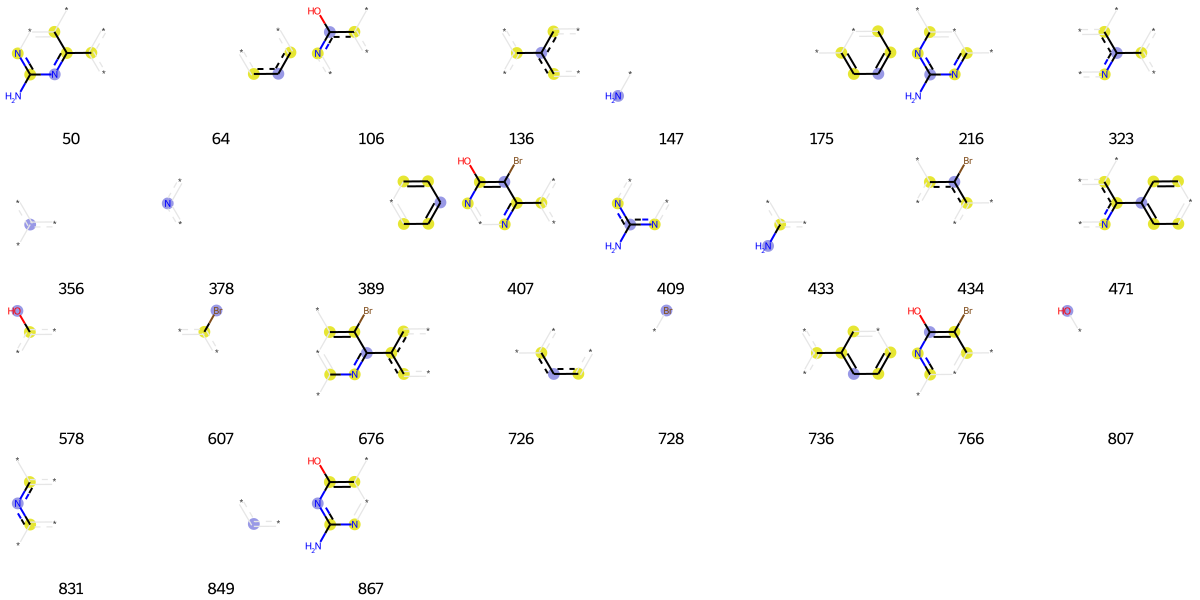

In [1306]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [1307]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[0,
 66,
 73,
 74,
 75,
 76,
 84,
 90,
 119,
 125,
 128,
 158,
 191,
 299,
 301,
 324,
 329,
 351,
 356,
 378,
 380,
 428,
 433,
 458,
 491,
 558,
 562,
 627,
 659,
 713,
 717,
 726,
 729,
 787,
 795,
 806,
 831,
 834,
 842,
 843,
 849,
 875,
 915,
 926,
 976,
 980,
 994,
 1019]

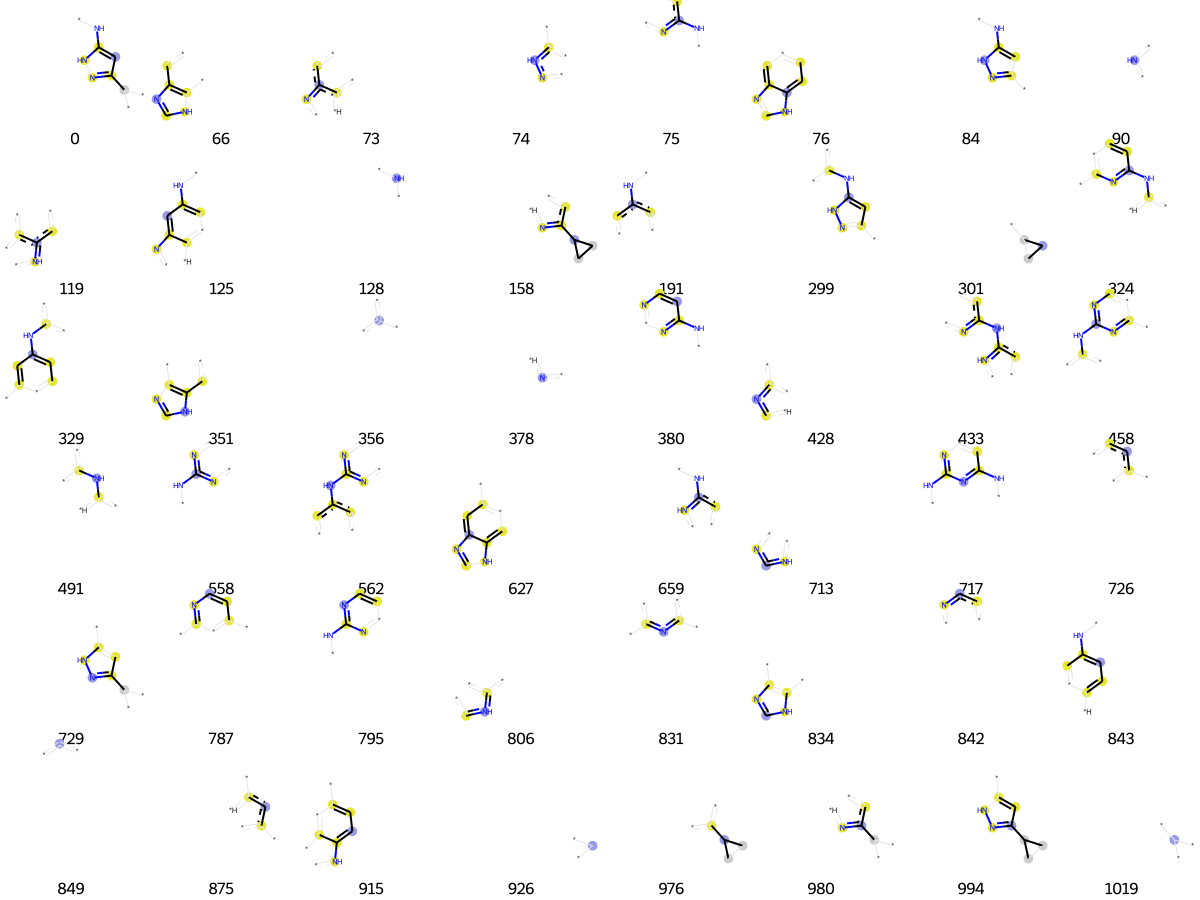

In [1308]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [1309]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[7,
 16,
 19,
 33,
 36,
 64,
 136,
 138,
 163,
 182,
 186,
 231,
 233,
 250,
 257,
 260,
 301,
 302,
 350,
 356,
 377,
 378,
 437,
 439,
 504,
 511,
 519,
 529,
 562,
 579,
 590,
 598,
 622,
 694,
 696,
 726,
 736,
 757,
 775,
 807,
 842,
 849,
 850,
 860,
 926,
 987,
 1019]

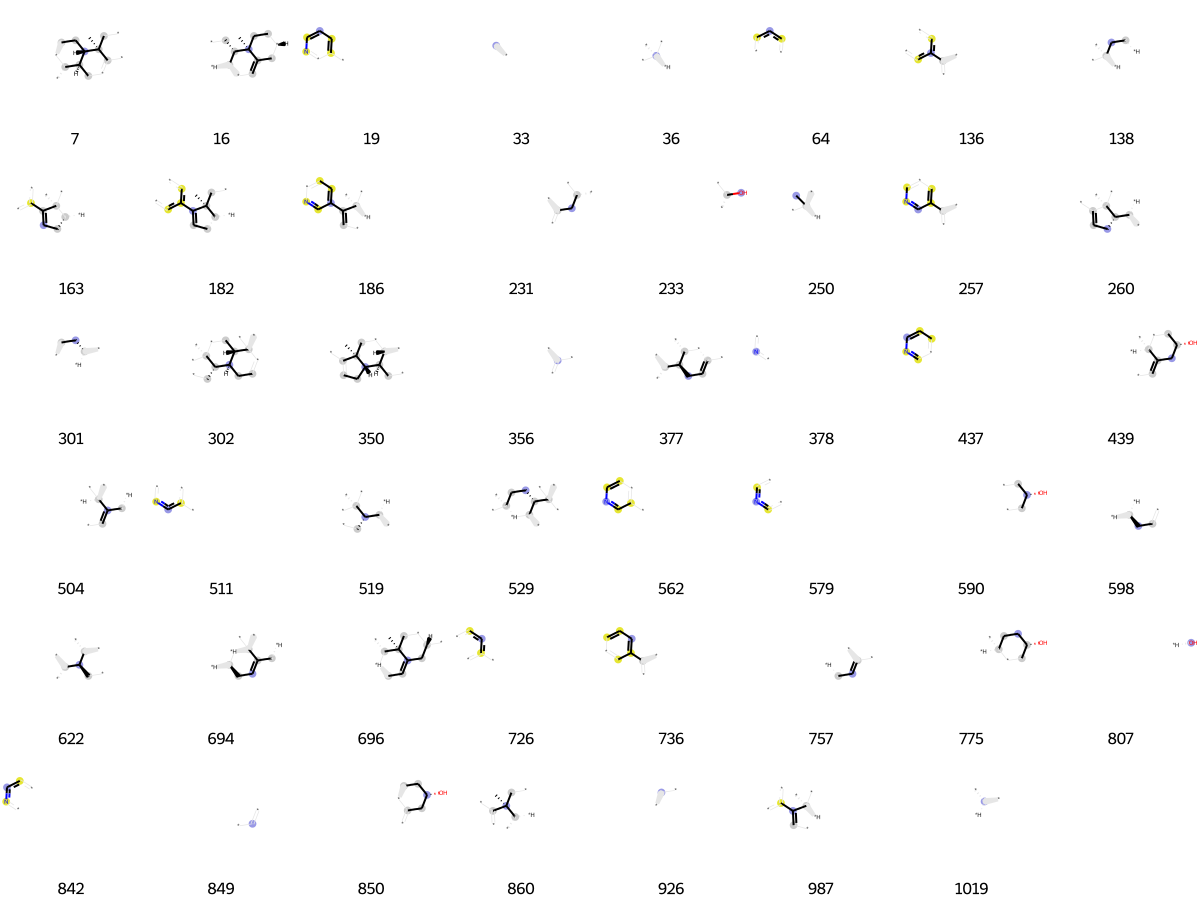

In [1310]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [1311]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[26,
 63,
 64,
 80,
 136,
 165,
 175,
 203,
 222,
 333,
 352,
 356,
 367,
 389,
 549,
 551,
 561,
 578,
 583,
 593,
 669,
 691,
 709,
 715,
 726,
 736,
 765,
 807,
 815,
 831,
 849,
 875,
 898,
 953,
 1016]

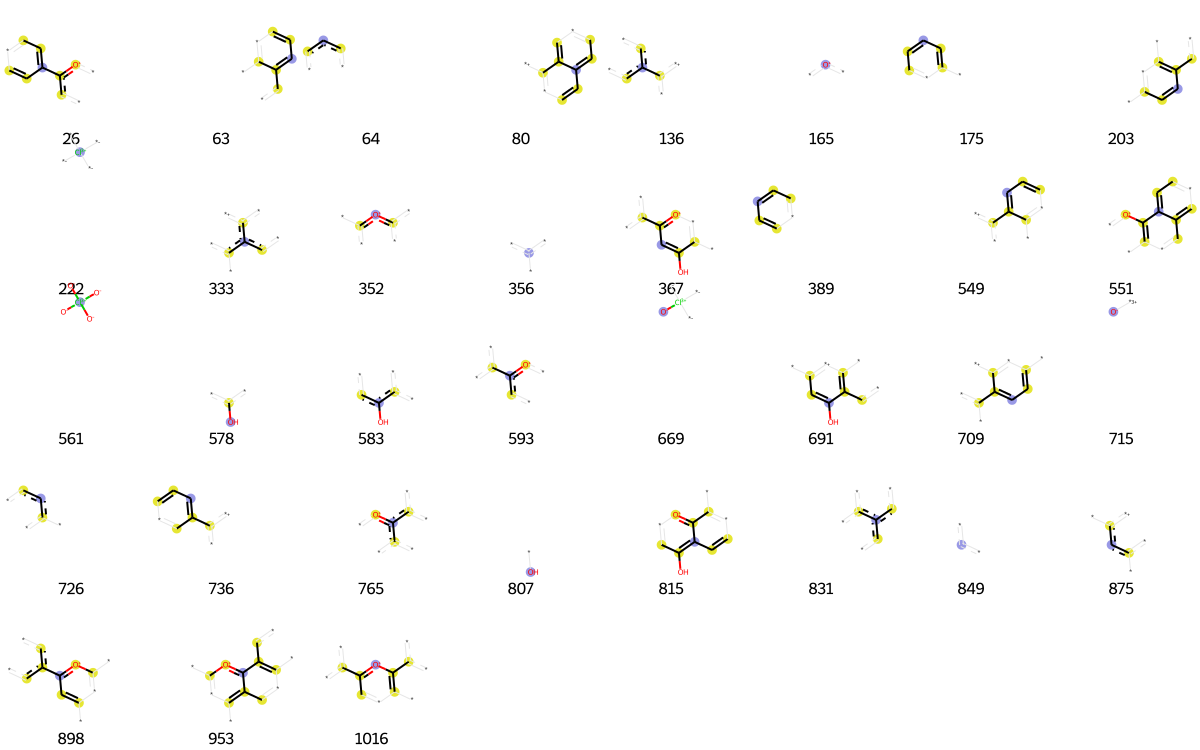

In [1312]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1313]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[15,
 64,
 73,
 128,
 133,
 157,
 161,
 184,
 191,
 202,
 329,
 333,
 342,
 343,
 356,
 378,
 420,
 428,
 485,
 489,
 491,
 579,
 607,
 621,
 629,
 636,
 650,
 694,
 703,
 708,
 726,
 728,
 766,
 786,
 792,
 794,
 807,
 843,
 849,
 875,
 888,
 893,
 909,
 922,
 959,
 961]

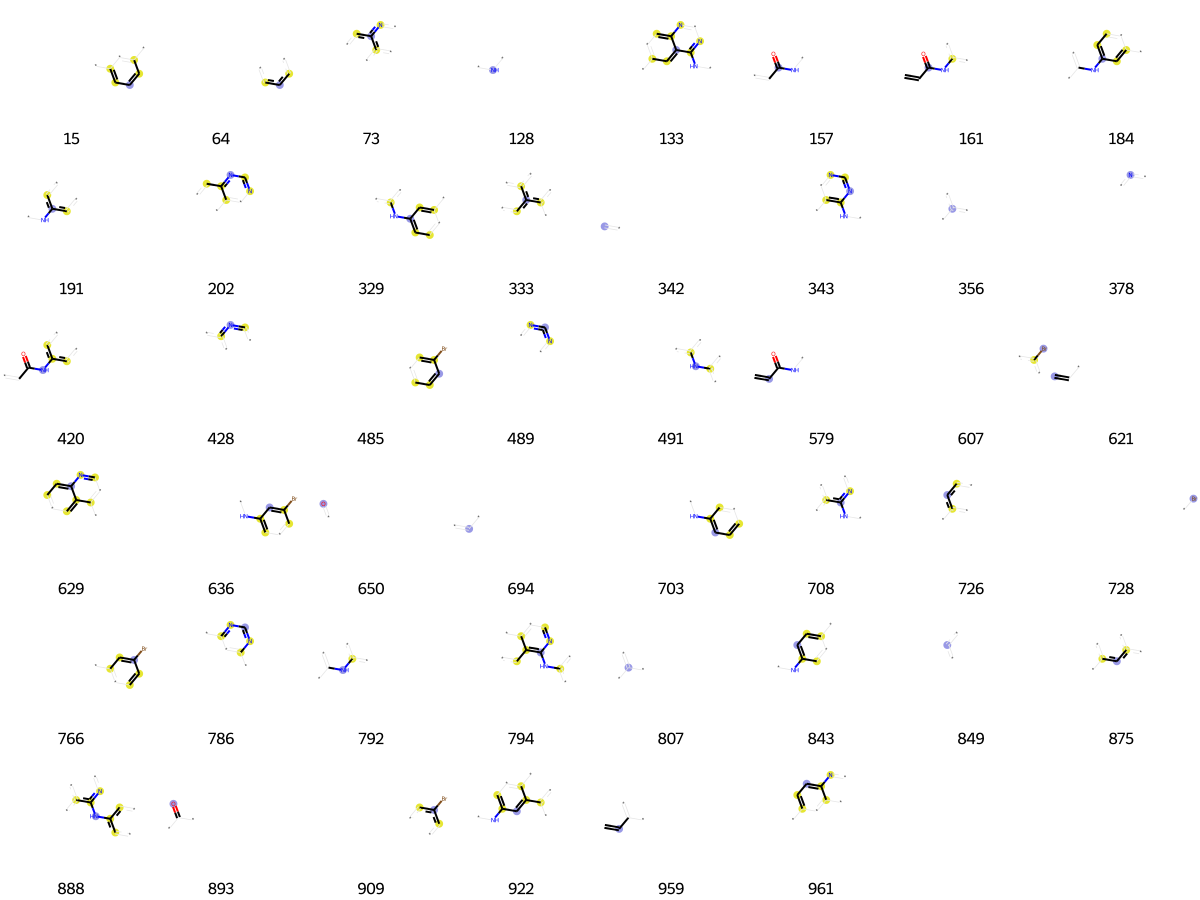

In [1314]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [1315]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[33,
 43,
 64,
 73,
 80,
 82,
 102,
 128,
 145,
 147,
 175,
 184,
 191,
 215,
 248,
 294,
 310,
 322,
 325,
 327,
 333,
 356,
 378,
 389,
 423,
 428,
 433,
 463,
 486,
 496,
 573,
 596,
 650,
 654,
 695,
 698,
 707,
 718,
 726,
 730,
 745,
 775,
 792,
 807,
 831,
 843,
 847,
 849,
 875,
 893,
 902,
 910,
 922,
 954,
 961,
 967]

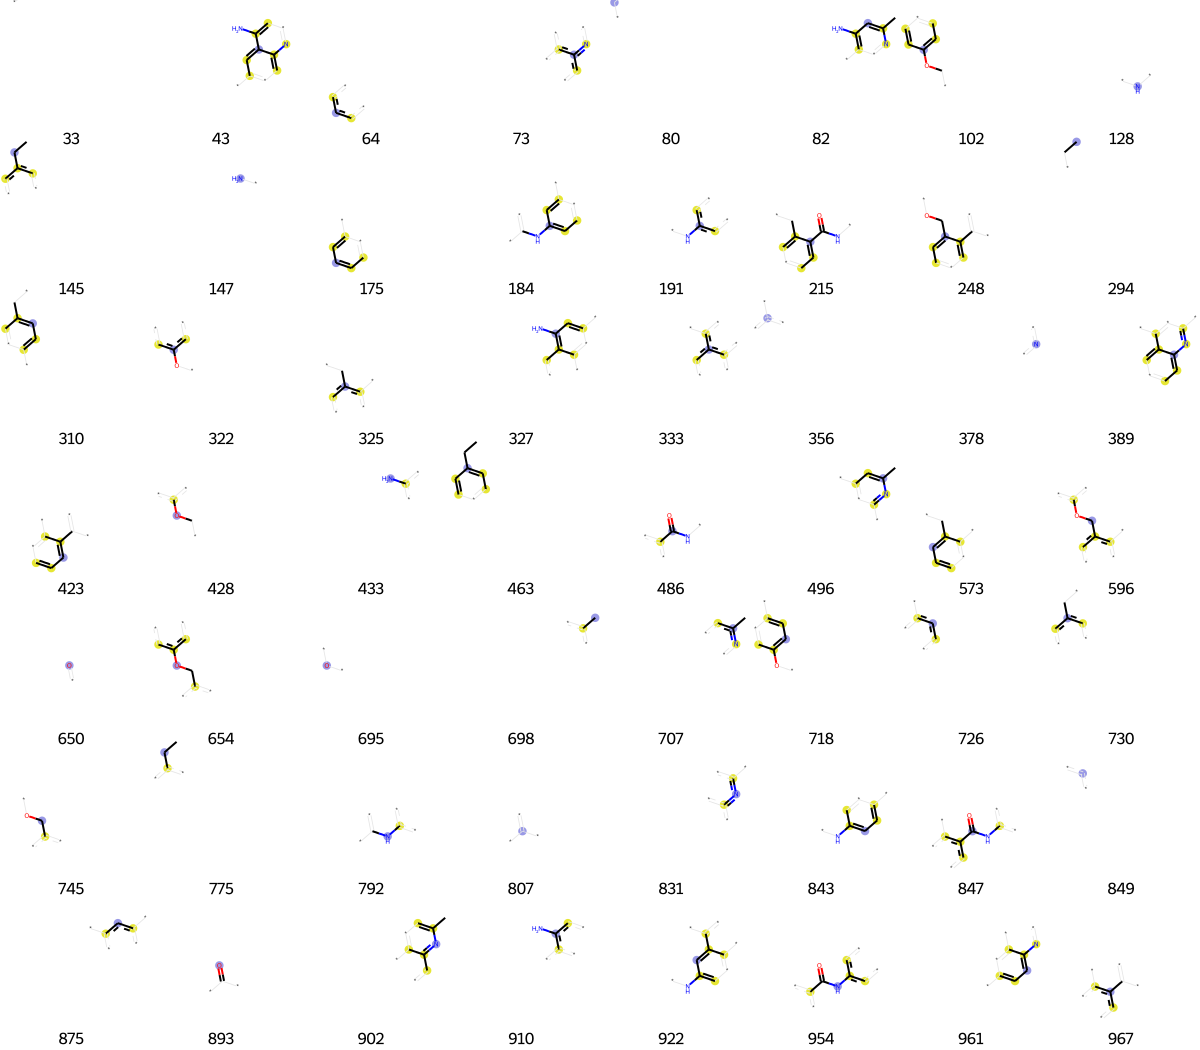

In [1316]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [1317]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[21,
 42,
 80,
 102,
 106,
 107,
 116,
 140,
 144,
 147,
 158,
 171,
 219,
 250,
 310,
 322,
 356,
 428,
 623,
 650,
 653,
 654,
 695,
 715,
 718,
 726,
 730,
 745,
 753,
 769,
 785,
 790,
 807,
 838,
 849,
 934,
 939,
 942,
 1018]

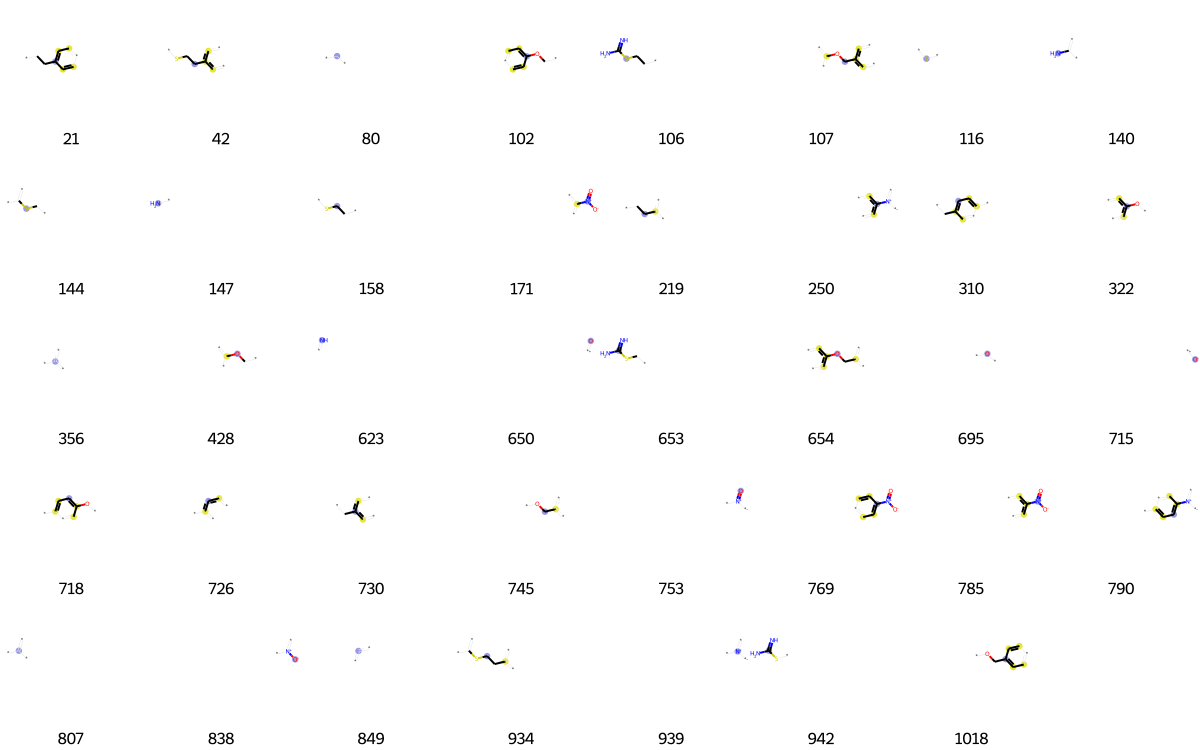

In [1318]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1319]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[3,
 17,
 33,
 36,
 59,
 64,
 80,
 175,
 250,
 271,
 285,
 287,
 288,
 314,
 352,
 356,
 371,
 393,
 426,
 440,
 588,
 597,
 623,
 624,
 638,
 642,
 650,
 679,
 726,
 799,
 807,
 821,
 849,
 879,
 893,
 896,
 926,
 935,
 984,
 1009,
 1019]

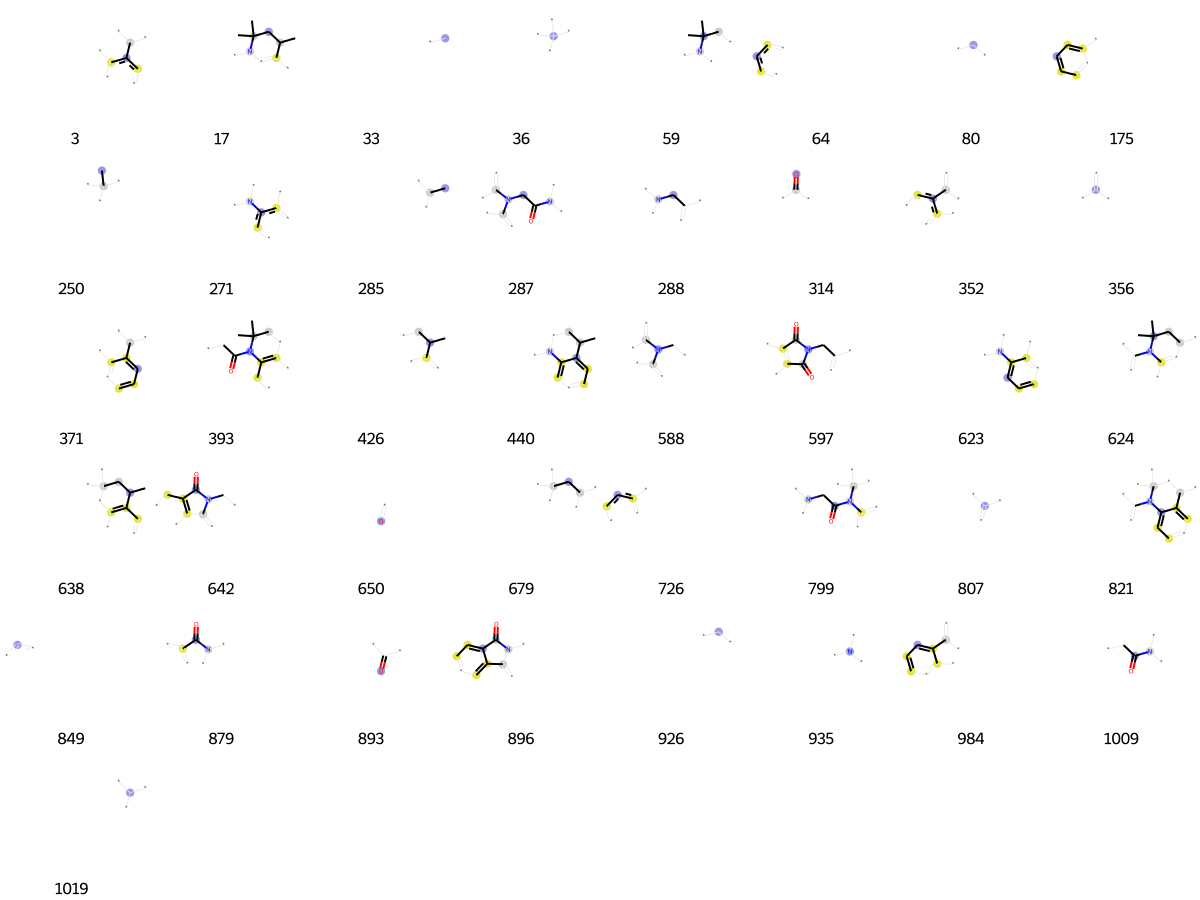

In [1320]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1321]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[3,
 8,
 33,
 80,
 94,
 104,
 128,
 140,
 162,
 190,
 197,
 219,
 221,
 249,
 278,
 310,
 356,
 419,
 441,
 483,
 486,
 512,
 623,
 650,
 667,
 675,
 695,
 698,
 709,
 721,
 726,
 730,
 807,
 828,
 841,
 849,
 875,
 893,
 917,
 946]

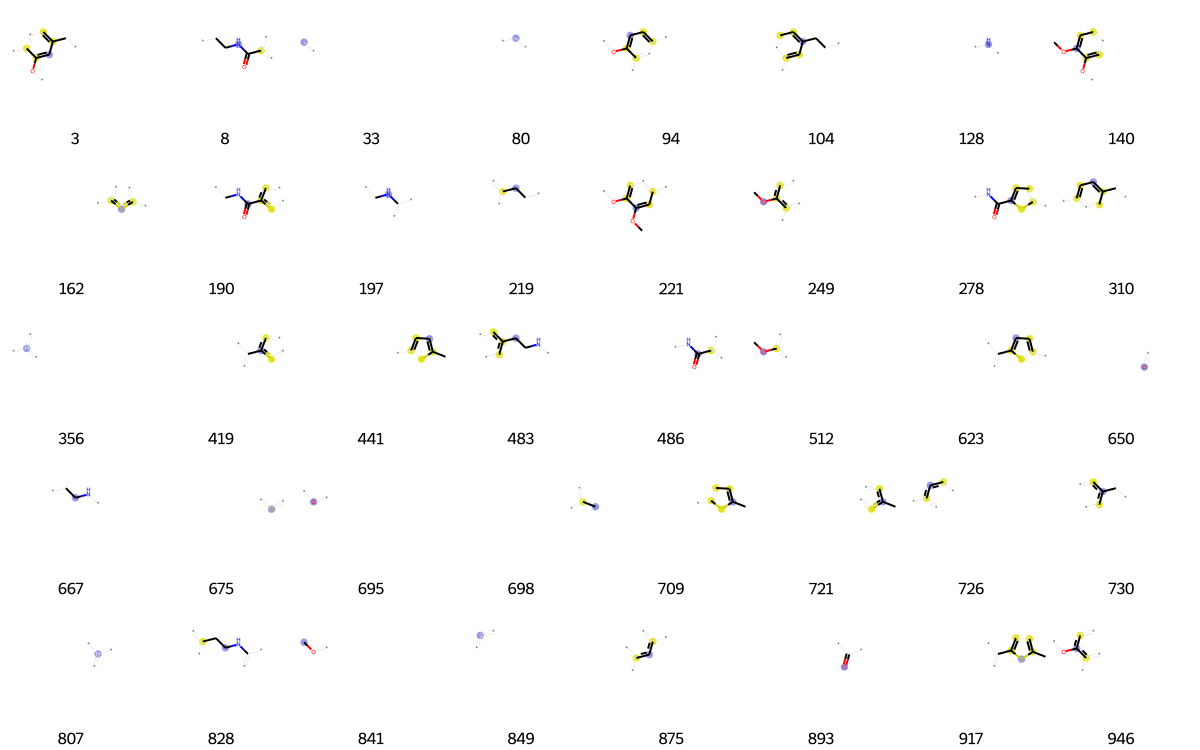

In [1322]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [1323]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 4,
 33,
 72,
 80,
 81,
 89,
 90,
 128,
 137,
 220,
 227,
 237,
 238,
 283,
 291,
 294,
 304,
 314,
 333,
 356,
 375,
 441,
 451,
 506,
 520,
 523,
 578,
 583,
 586,
 587,
 650,
 709,
 712,
 721,
 726,
 805,
 807,
 849,
 908,
 979]

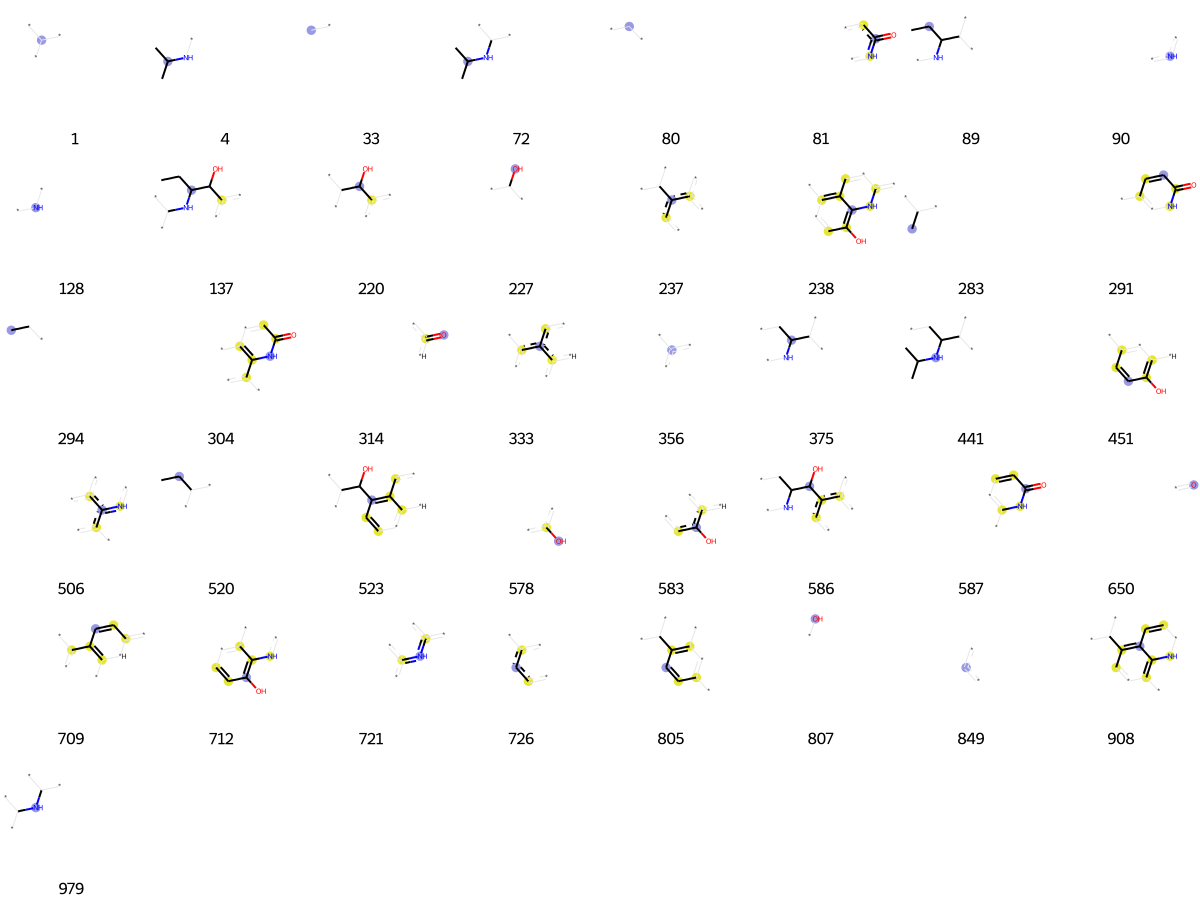

In [1324]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1325]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[15,
 58,
 63,
 64,
 80,
 128,
 147,
 192,
 198,
 303,
 310,
 317,
 319,
 333,
 350,
 356,
 366,
 452,
 493,
 502,
 561,
 592,
 602,
 650,
 659,
 667,
 709,
 715,
 726,
 732,
 816,
 831,
 836,
 849,
 862,
 875,
 887,
 974,
 981]

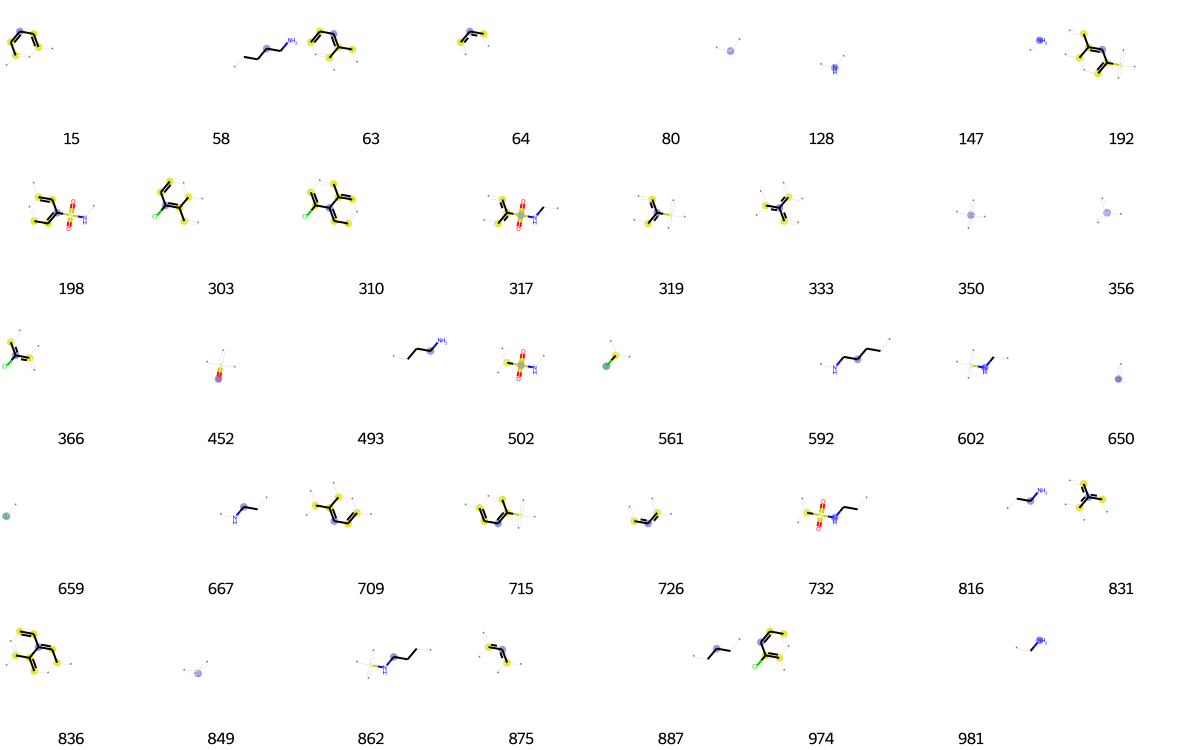

In [1326]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1327]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[29,
 33,
 36,
 64,
 90,
 96,
 107,
 142,
 175,
 281,
 314,
 315,
 352,
 356,
 367,
 388,
 446,
 527,
 556,
 624,
 633,
 650,
 694,
 698,
 721,
 726,
 764,
 849,
 875,
 958,
 969,
 977,
 984,
 1023]

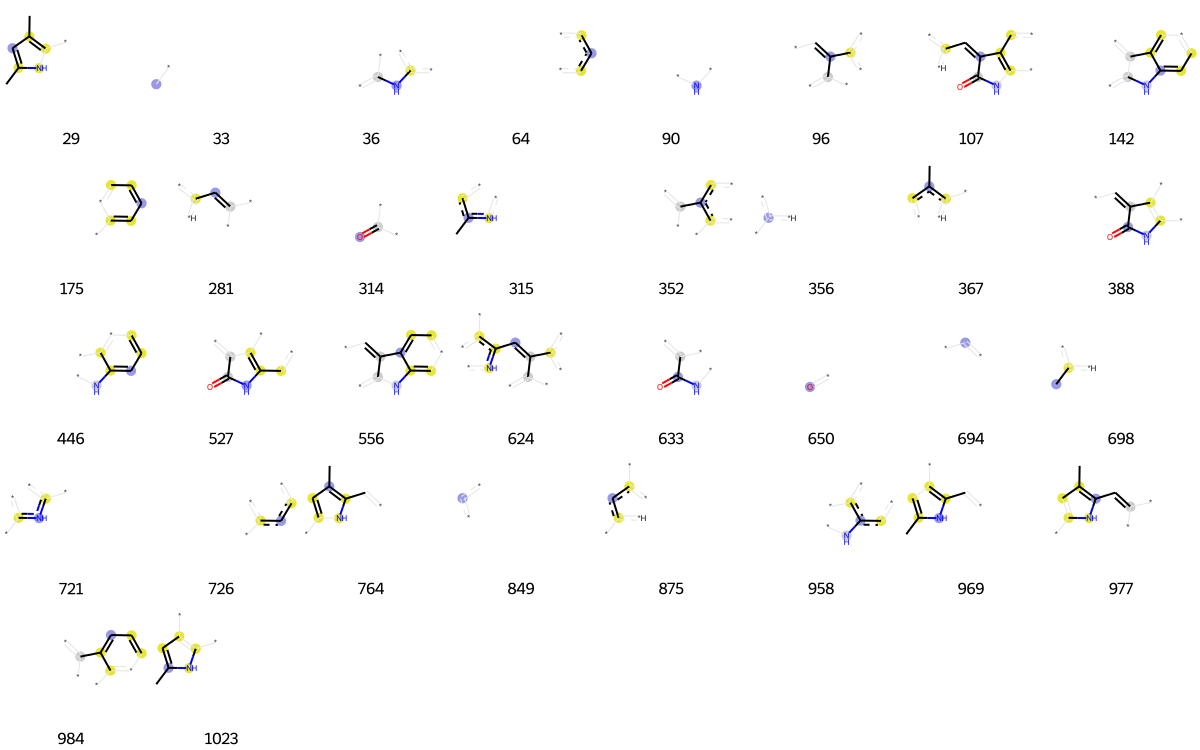

In [1328]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1329]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[33,
 34,
 39,
 50,
 80,
 133,
 207,
 219,
 283,
 294,
 314,
 333,
 356,
 365,
 389,
 416,
 456,
 471,
 488,
 568,
 580,
 606,
 623,
 638,
 647,
 650,
 656,
 675,
 702,
 730,
 738,
 756,
 786,
 794,
 802,
 807,
 849,
 850,
 875,
 893,
 920,
 935,
 1010]

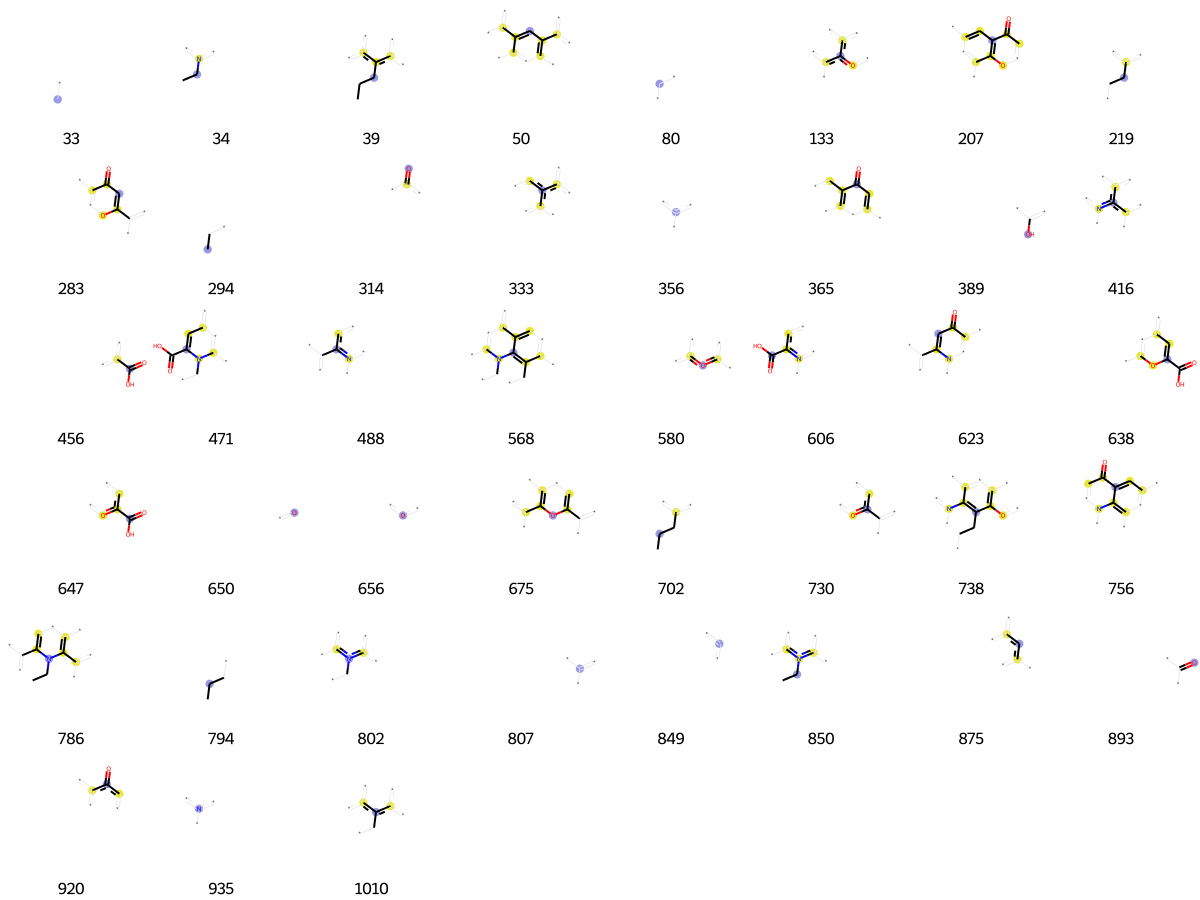

In [1330]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1331]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[32,
 33,
 46,
 80,
 83,
 116,
 136,
 141,
 158,
 179,
 222,
 235,
 263,
 341,
 352,
 356,
 378,
 389,
 428,
 489,
 495,
 510,
 511,
 516,
 528,
 540,
 543,
 552,
 607,
 650,
 675,
 698,
 713,
 726,
 770,
 786,
 799,
 807,
 849,
 893,
 896,
 960,
 1015]

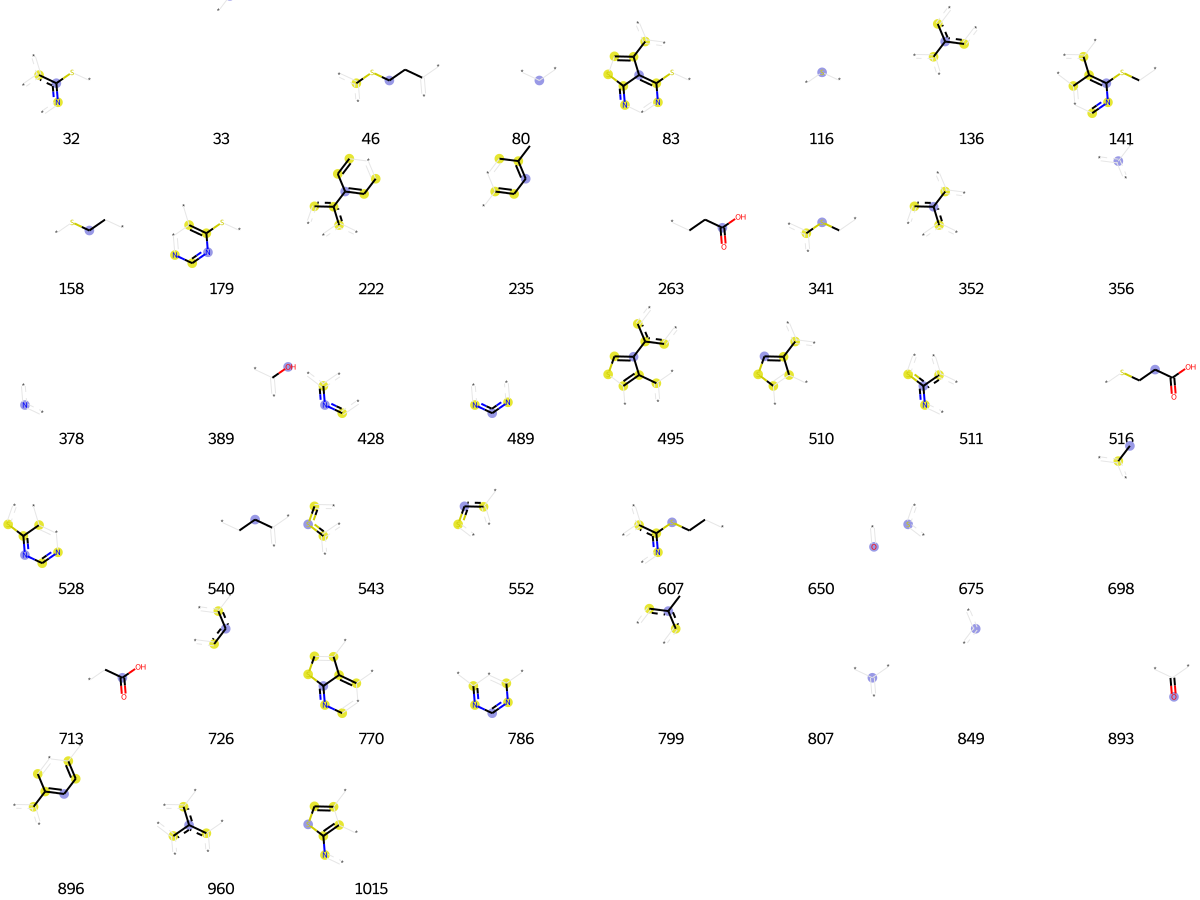

In [1332]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1333]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 33,
 42,
 64,
 73,
 80,
 82,
 83,
 107,
 111,
 122,
 147,
 151,
 165,
 175,
 197,
 216,
 232,
 235,
 252,
 283,
 314,
 333,
 334,
 335,
 356,
 361,
 378,
 389,
 478,
 482,
 493,
 504,
 556,
 561,
 587,
 608,
 650,
 659,
 672,
 673,
 698,
 709,
 726,
 730,
 741,
 749,
 799,
 802,
 807,
 816,
 831,
 837,
 849,
 875,
 881,
 887,
 893,
 896,
 927,
 935,
 981]

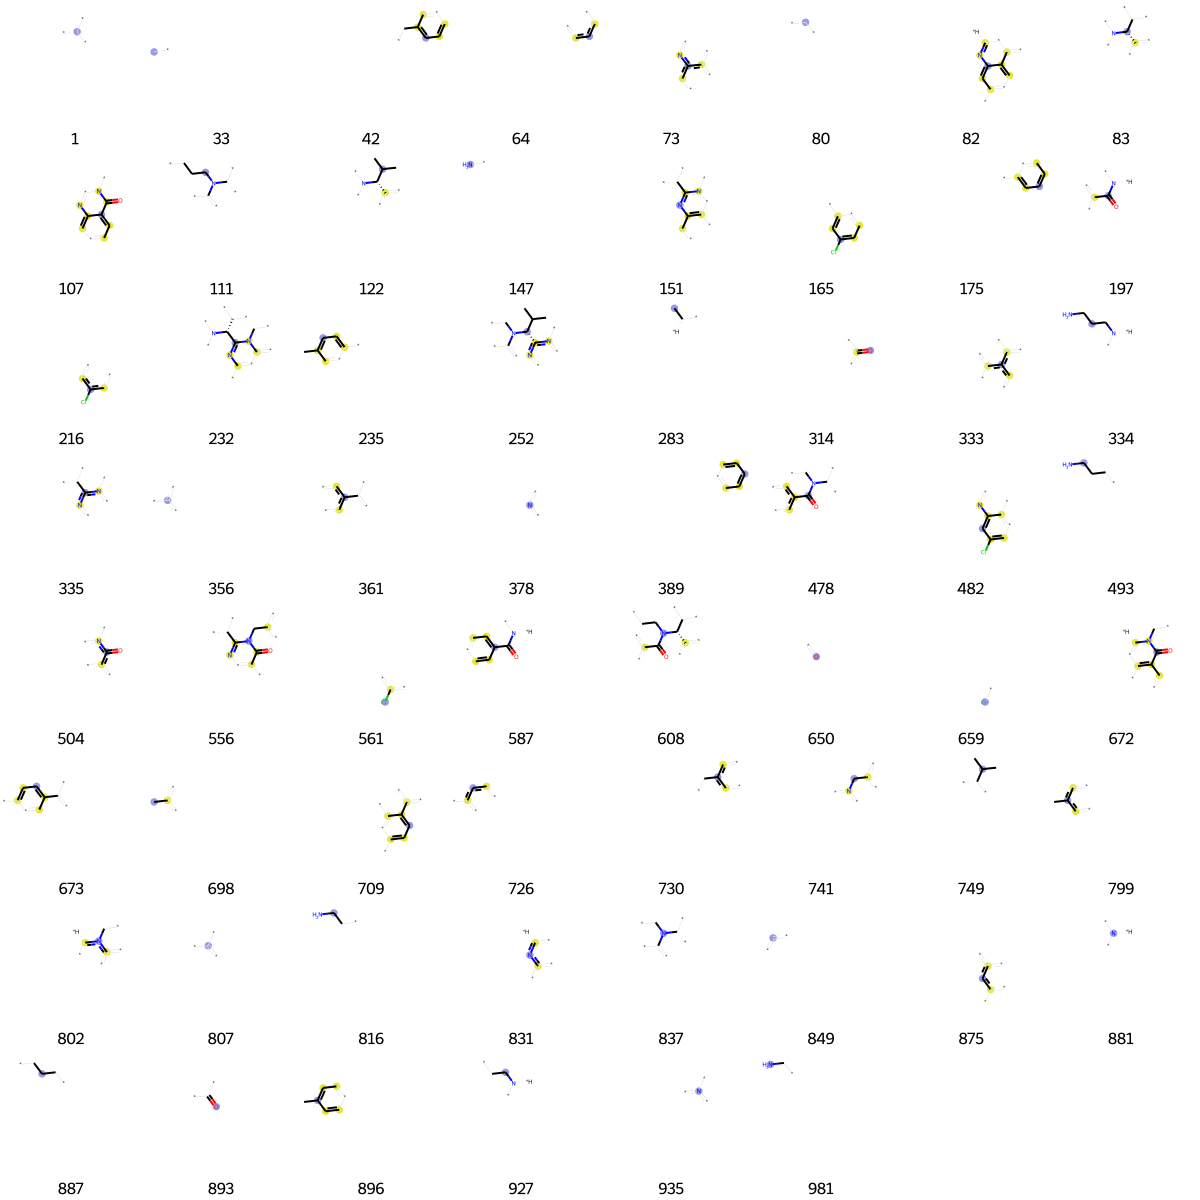

In [1334]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1335]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[15,
 25,
 31,
 33,
 64,
 80,
 190,
 222,
 268,
 314,
 356,
 367,
 407,
 433,
 492,
 511,
 532,
 606,
 608,
 650,
 656,
 698,
 726,
 739,
 750,
 799,
 801,
 807,
 819,
 849,
 875,
 926,
 935,
 952,
 1013,
 1019]

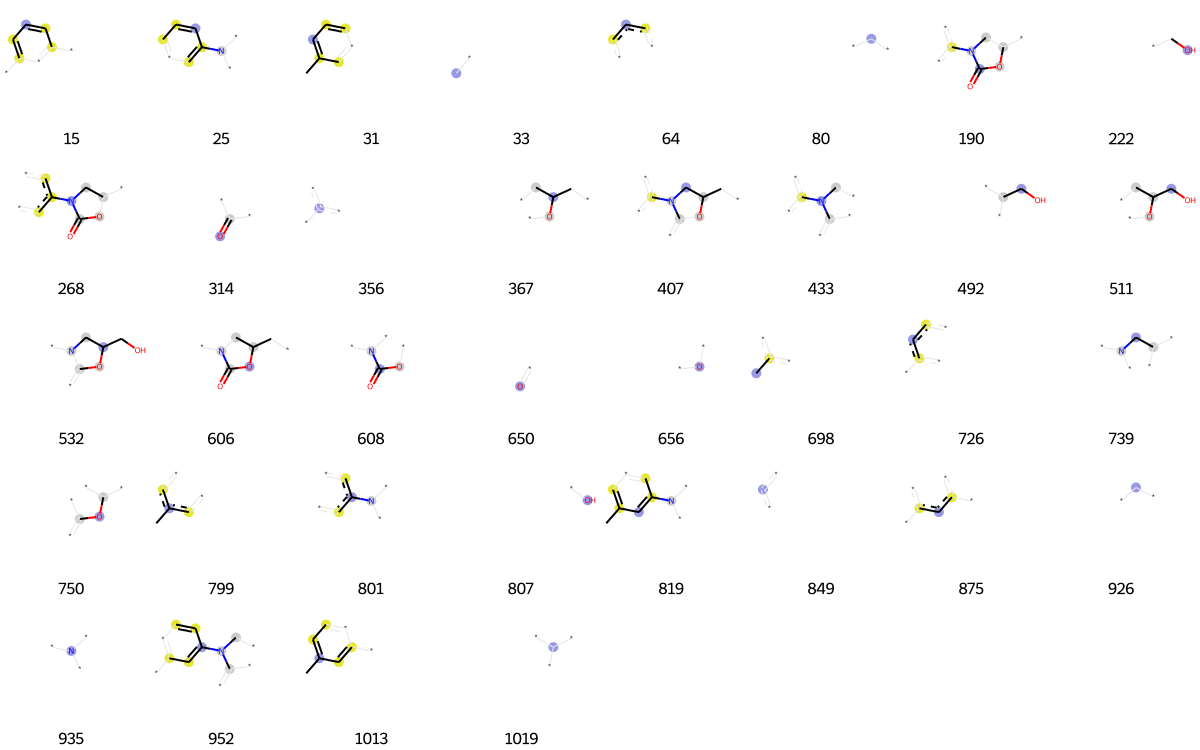

In [1336]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1337]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 2,
 4,
 77,
 80,
 171,
 227,
 356,
 378,
 387,
 395,
 398,
 428,
 431,
 456,
 465,
 577,
 603,
 650,
 689,
 715,
 753,
 767,
 789,
 807,
 838,
 839,
 842,
 849,
 898,
 914,
 926,
 935,
 939,
 953,
 974,
 1011,
 1014]

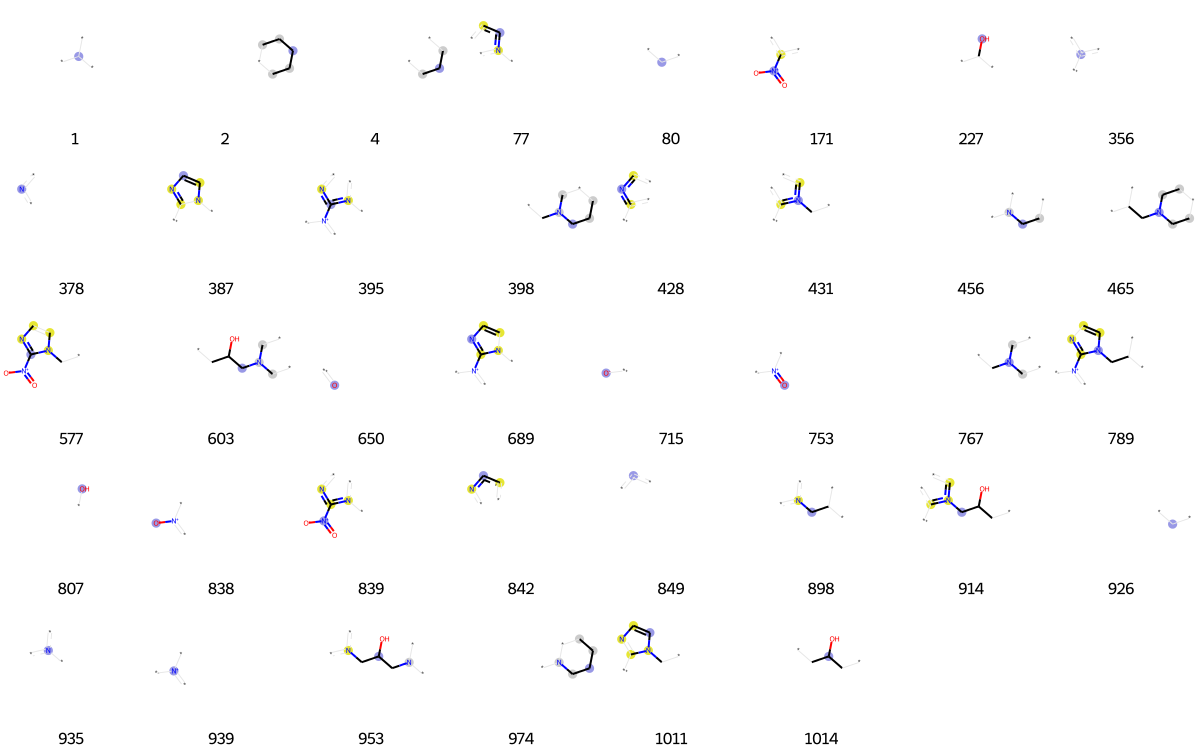

In [1338]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1339]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 4,
 13,
 15,
 33,
 44,
 63,
 64,
 79,
 80,
 147,
 172,
 175,
 195,
 248,
 251,
 293,
 294,
 301,
 325,
 333,
 356,
 361,
 367,
 389,
 444,
 446,
 549,
 573,
 600,
 620,
 644,
 646,
 649,
 650,
 656,
 694,
 695,
 726,
 802,
 807,
 813,
 821,
 831,
 849,
 853,
 881,
 893,
 926,
 927,
 932,
 950,
 957,
 976,
 1019]

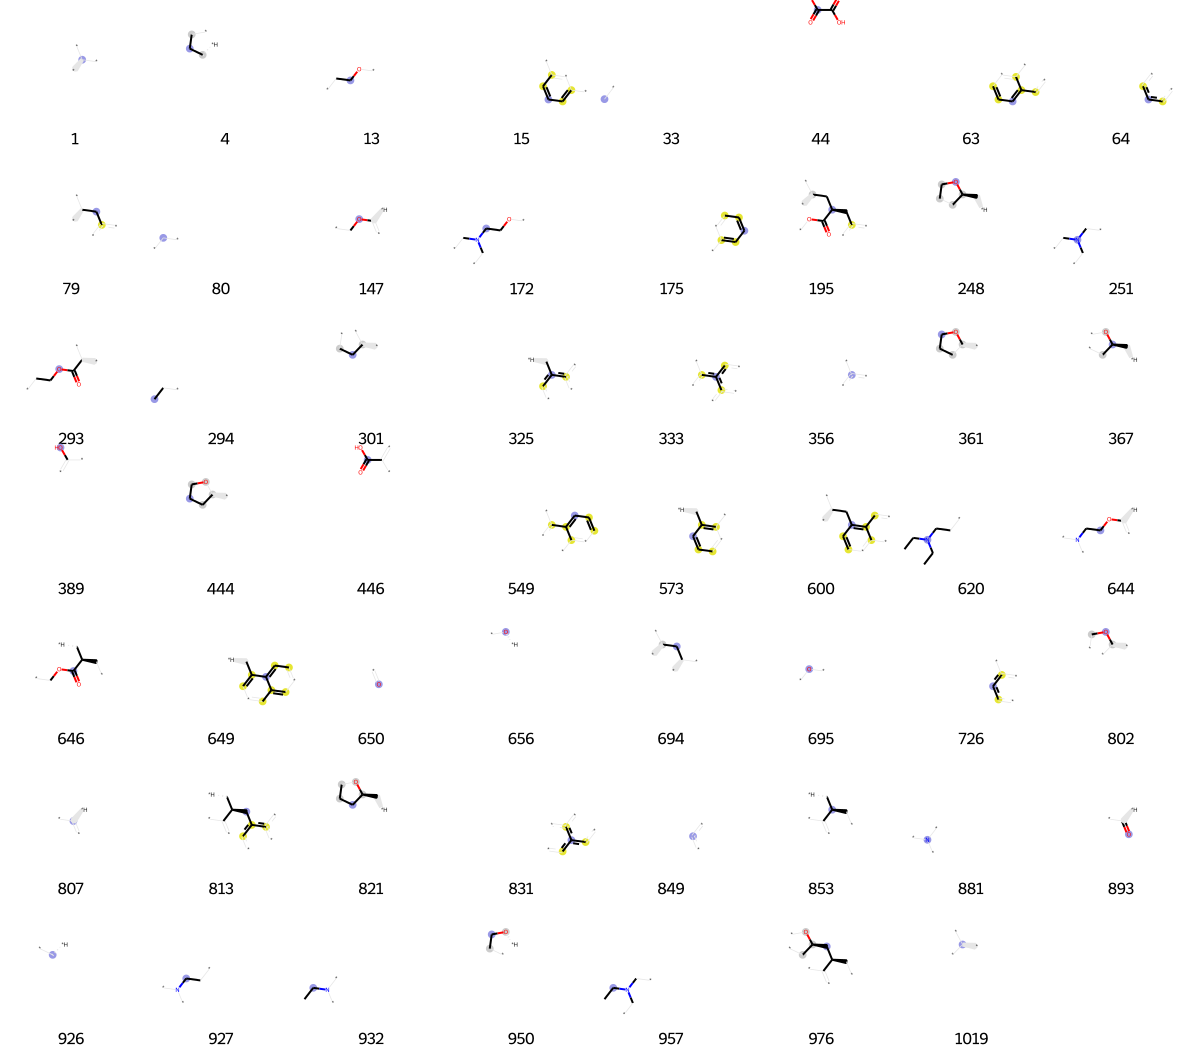

In [1340]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [1341]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[13, 33, 233, 463, 521, 576, 695, 807, 841, 912, 926, 937, 1019]

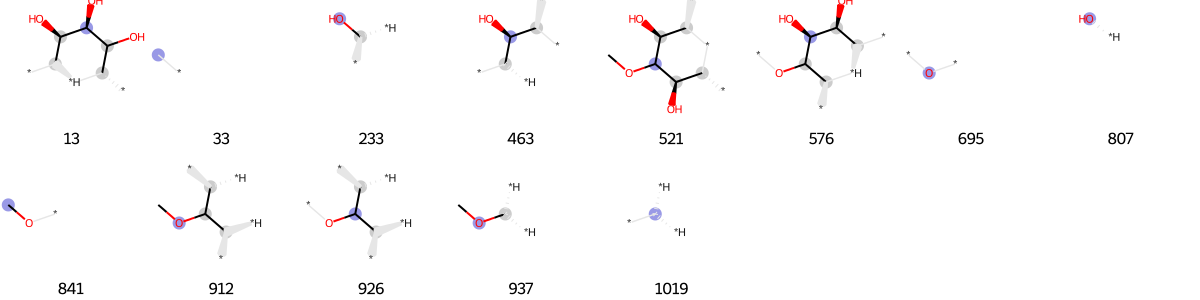

In [1342]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1343]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[25,
 36,
 53,
 64,
 66,
 80,
 90,
 138,
 175,
 256,
 284,
 314,
 351,
 355,
 356,
 367,
 375,
 389,
 417,
 441,
 456,
 457,
 462,
 513,
 562,
 588,
 623,
 650,
 652,
 656,
 690,
 711,
 713,
 726,
 750,
 767,
 801,
 814,
 842,
 849,
 851,
 881,
 899,
 908,
 926,
 935,
 1019]

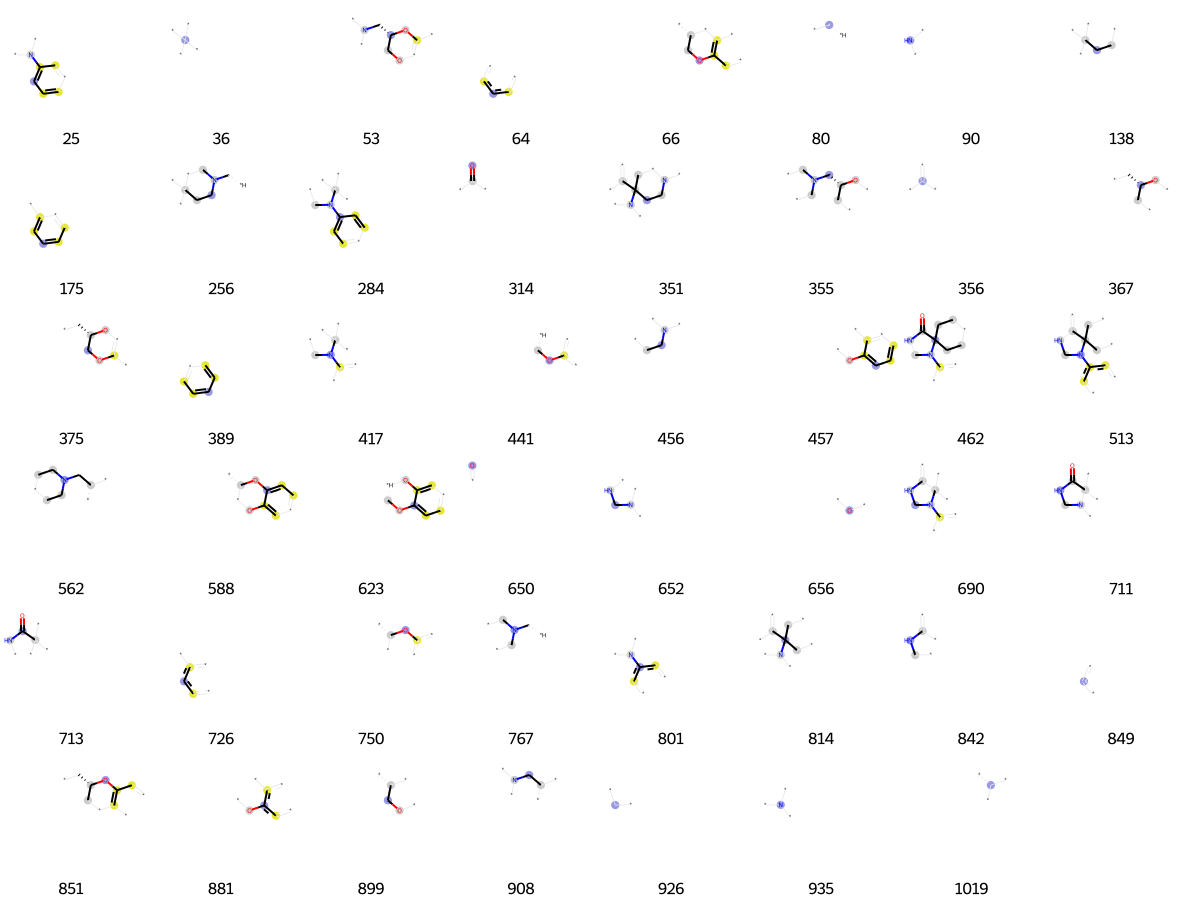

In [1344]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [1345]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[33,
 36,
 37,
 61,
 80,
 84,
 106,
 113,
 130,
 141,
 170,
 182,
 222,
 233,
 250,
 268,
 285,
 301,
 314,
 356,
 404,
 412,
 424,
 450,
 504,
 519,
 532,
 540,
 547,
 585,
 588,
 600,
 631,
 640,
 650,
 659,
 679,
 714,
 760,
 767,
 787,
 807,
 849,
 885,
 893,
 926,
 942,
 951,
 967,
 973,
 997,
 1002,
 1019,
 1020]

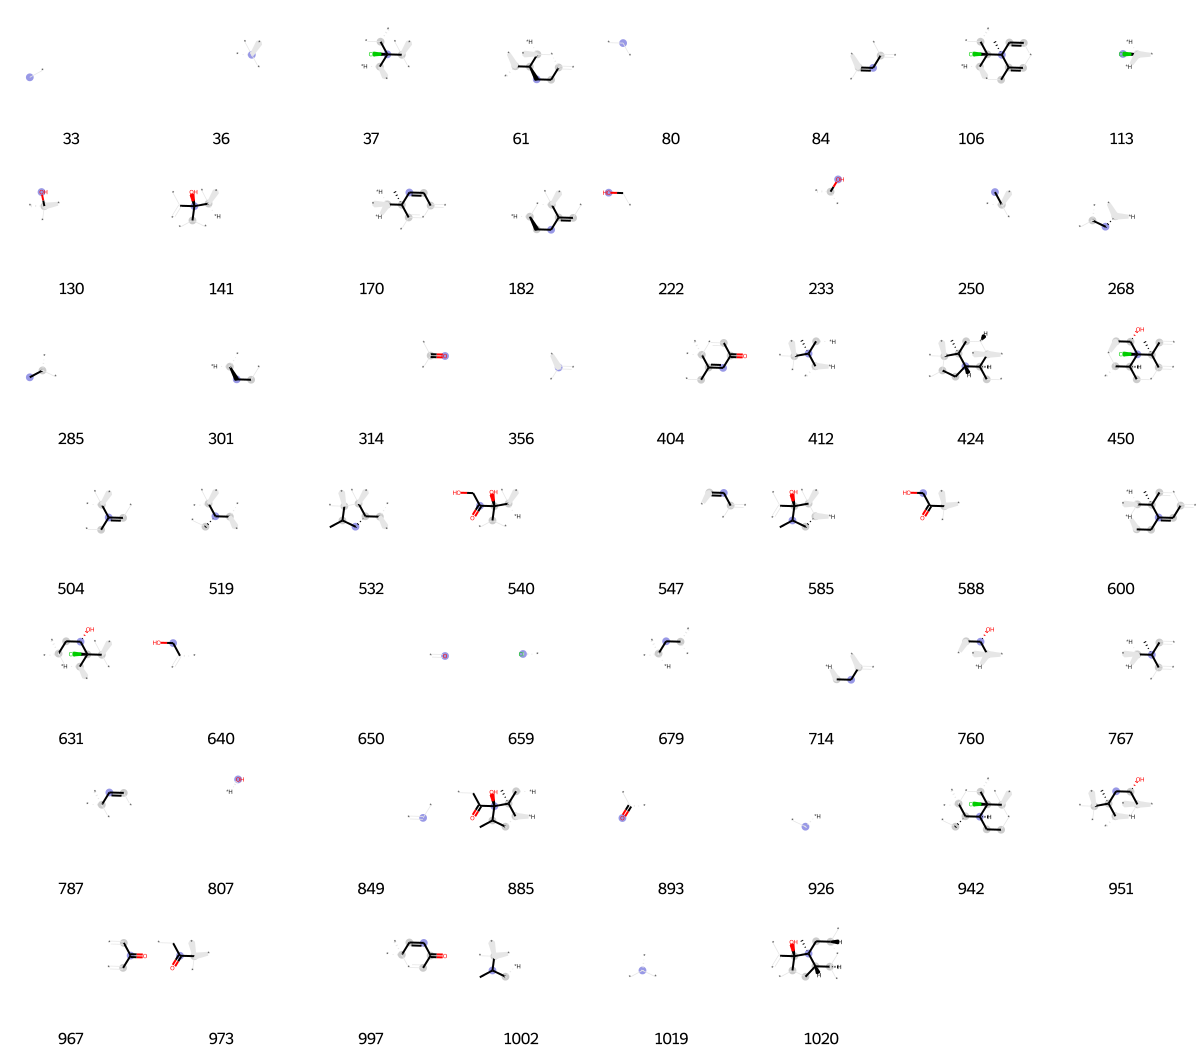

In [1346]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1347]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 31,
 33,
 80,
 119,
 128,
 191,
 227,
 246,
 251,
 263,
 273,
 294,
 338,
 341,
 350,
 356,
 389,
 409,
 420,
 452,
 496,
 508,
 557,
 591,
 645,
 650,
 661,
 670,
 692,
 694,
 726,
 739,
 794,
 807,
 829,
 843,
 849,
 872,
 881,
 887,
 893,
 927,
 932,
 934,
 956,
 957,
 976]

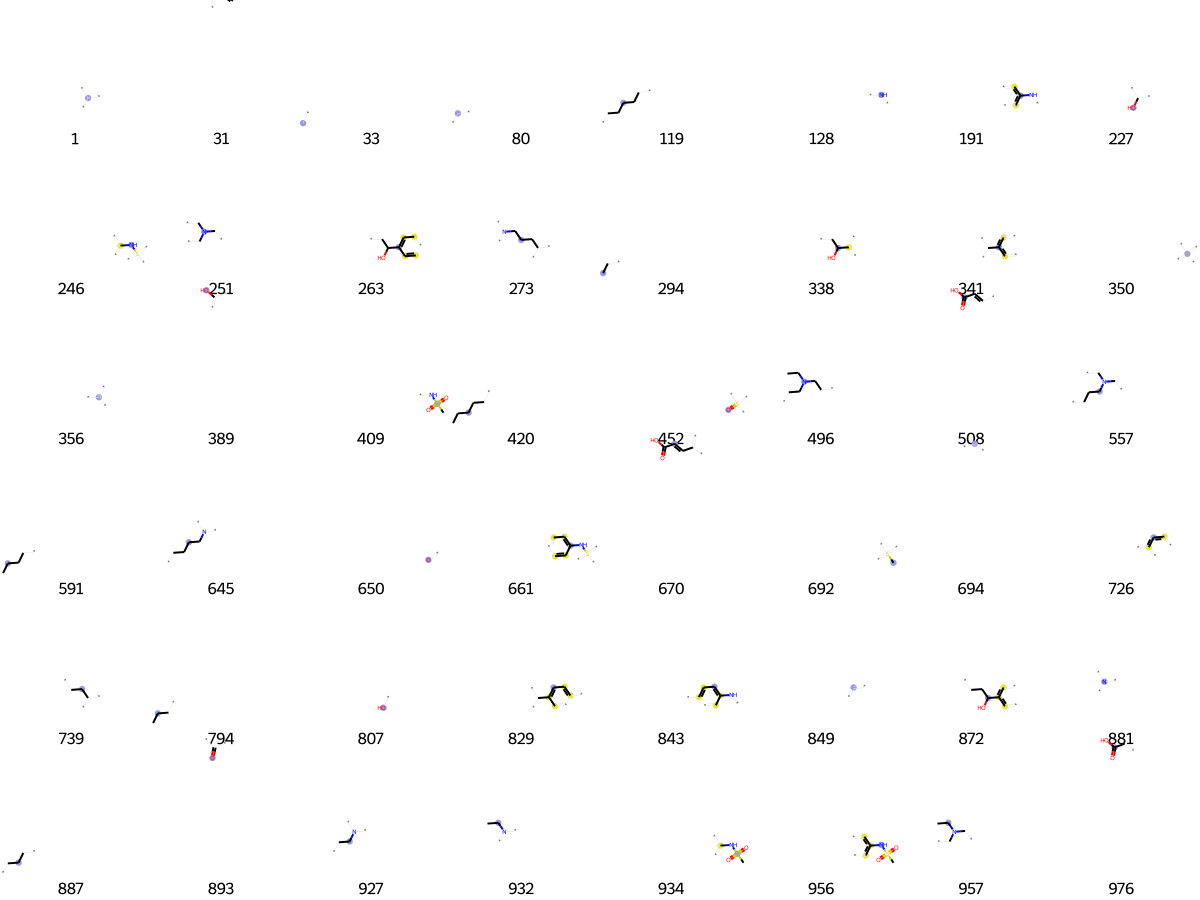

In [1348]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1349]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[3,
 33,
 53,
 87,
 90,
 212,
 221,
 249,
 250,
 285,
 305,
 356,
 483,
 512,
 568,
 636,
 649,
 695,
 714,
 826,
 841,
 849,
 875,
 924,
 926,
 946,
 972,
 1019]

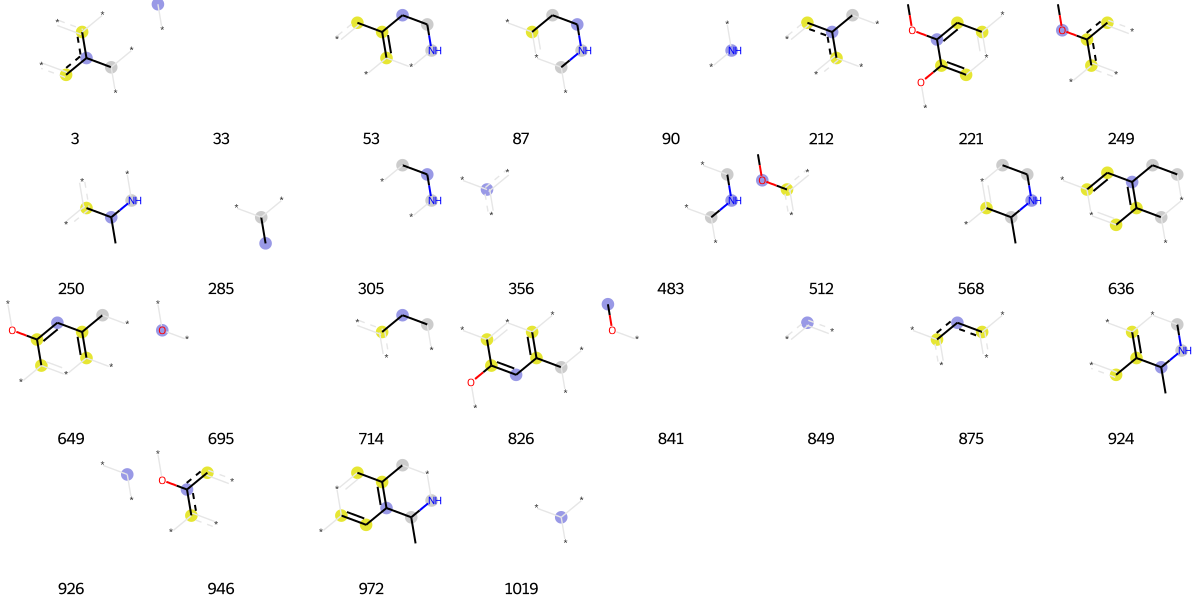

In [1350]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1351]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[1,
 26,
 33,
 47,
 102,
 119,
 121,
 145,
 268,
 278,
 301,
 303,
 338,
 352,
 356,
 361,
 650,
 695,
 698,
 799,
 807,
 837,
 838,
 849,
 875,
 886,
 888,
 892,
 893,
 926,
 929,
 935,
 1019]

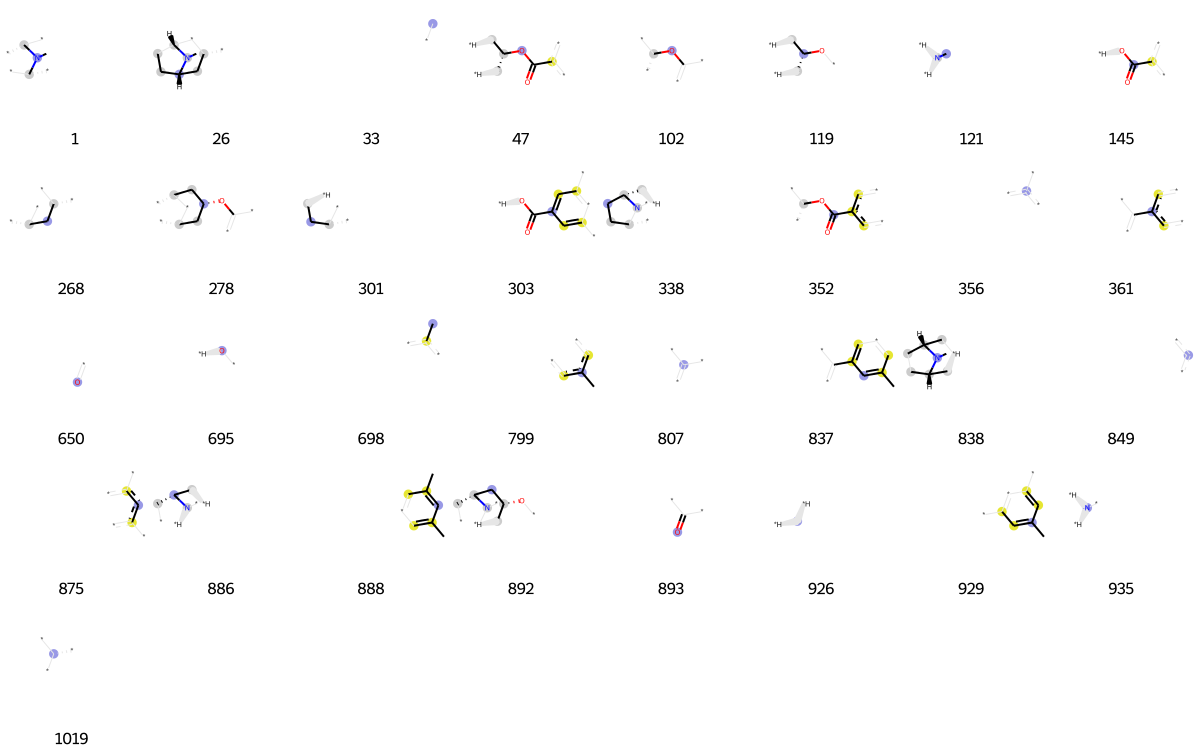

In [1352]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1353]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[13,
 33,
 64,
 66,
 80,
 90,
 128,
 136,
 139,
 175,
 200,
 270,
 274,
 348,
 356,
 378,
 391,
 428,
 441,
 457,
 494,
 511,
 588,
 609,
 623,
 631,
 650,
 652,
 656,
 671,
 689,
 693,
 695,
 724,
 726,
 750,
 778,
 785,
 792,
 807,
 808,
 815,
 832,
 845,
 849,
 855,
 860,
 875,
 881,
 893,
 896,
 899,
 915,
 926,
 927,
 946,
 969,
 980,
 1019]

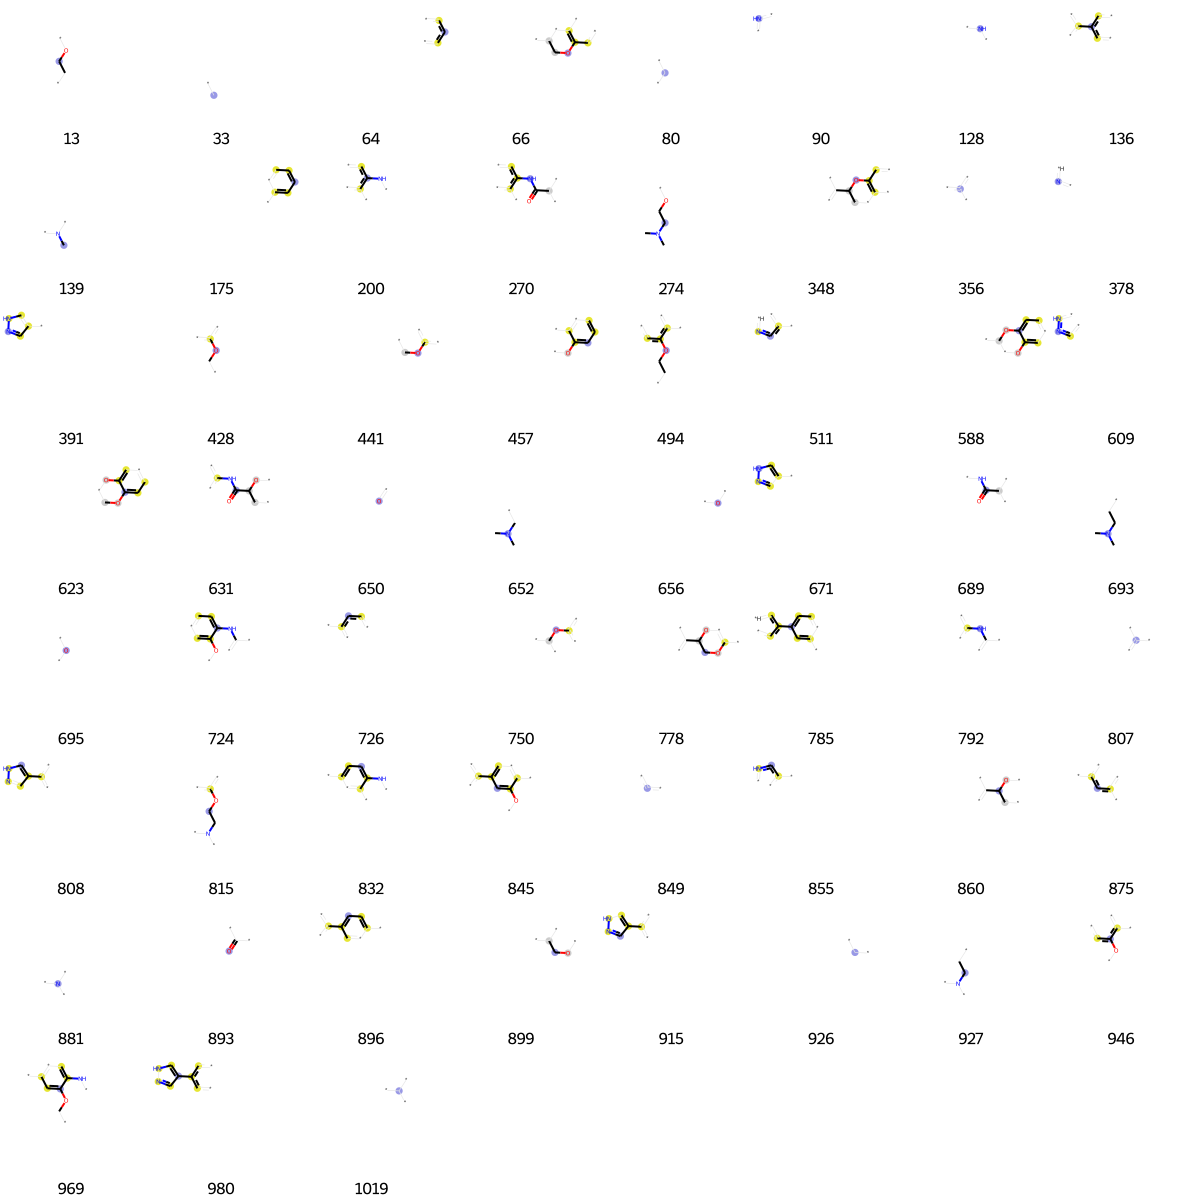

In [1354]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [1355]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[4,
 33,
 73,
 80,
 89,
 103,
 114,
 128,
 165,
 194,
 197,
 200,
 202,
 216,
 223,
 255,
 310,
 325,
 333,
 356,
 361,
 367,
 378,
 392,
 428,
 482,
 491,
 500,
 554,
 561,
 578,
 603,
 613,
 659,
 673,
 709,
 714,
 726,
 787,
 807,
 816,
 842,
 849,
 875,
 926,
 942,
 959,
 975,
 984,
 1017]

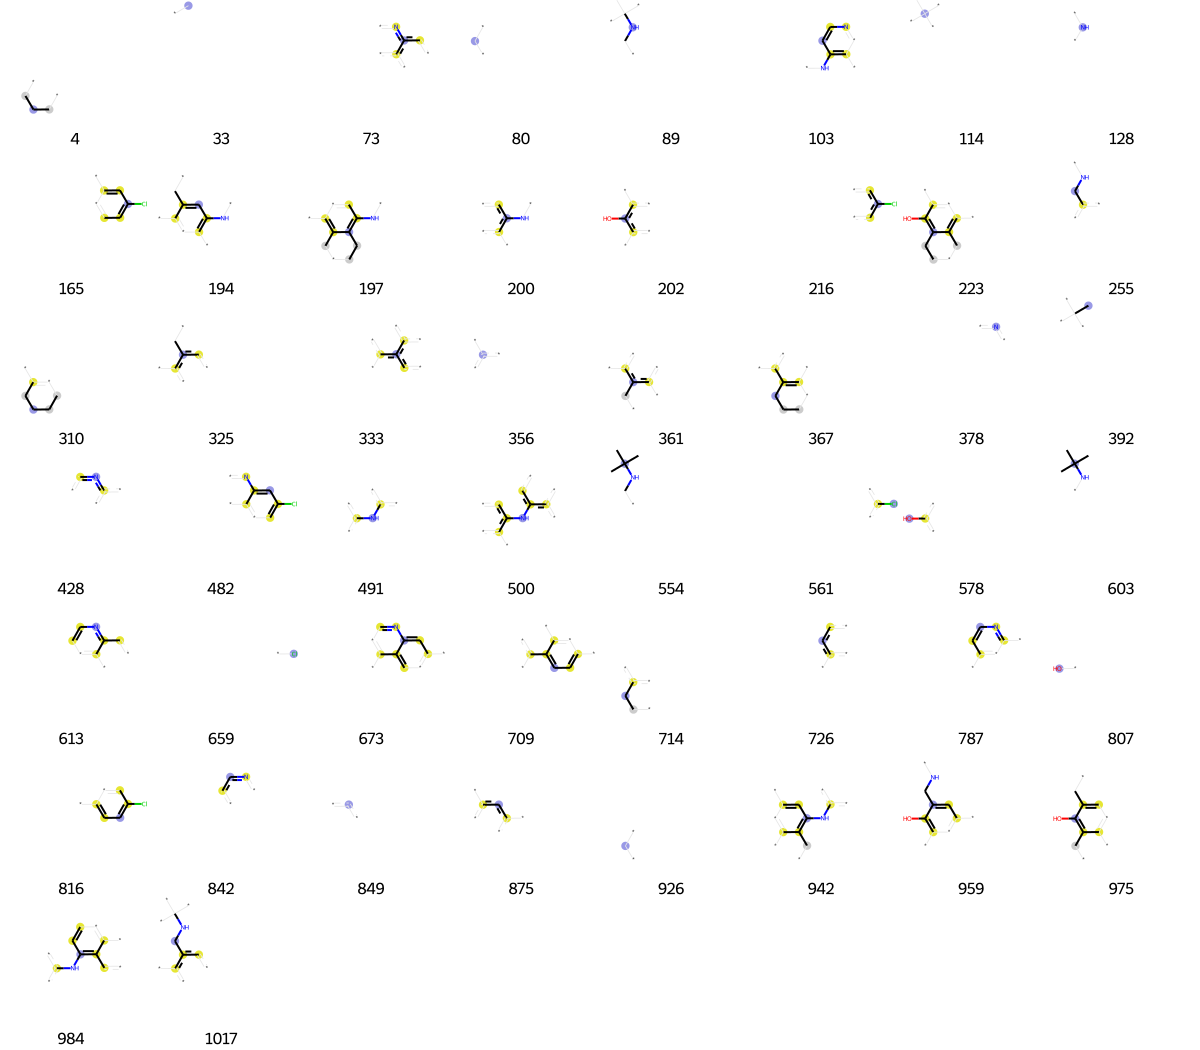

In [1356]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1357]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 33,
 57,
 94,
 114,
 119,
 130,
 136,
 236,
 252,
 283,
 319,
 326,
 335,
 350,
 356,
 362,
 368,
 378,
 393,
 407,
 428,
 429,
 448,
 452,
 456,
 480,
 484,
 511,
 520,
 544,
 546,
 565,
 600,
 643,
 650,
 664,
 690,
 692,
 695,
 699,
 712,
 715,
 726,
 807,
 809,
 816,
 841,
 849,
 875,
 879,
 888,
 893,
 904,
 926,
 935,
 942,
 946,
 967,
 985]

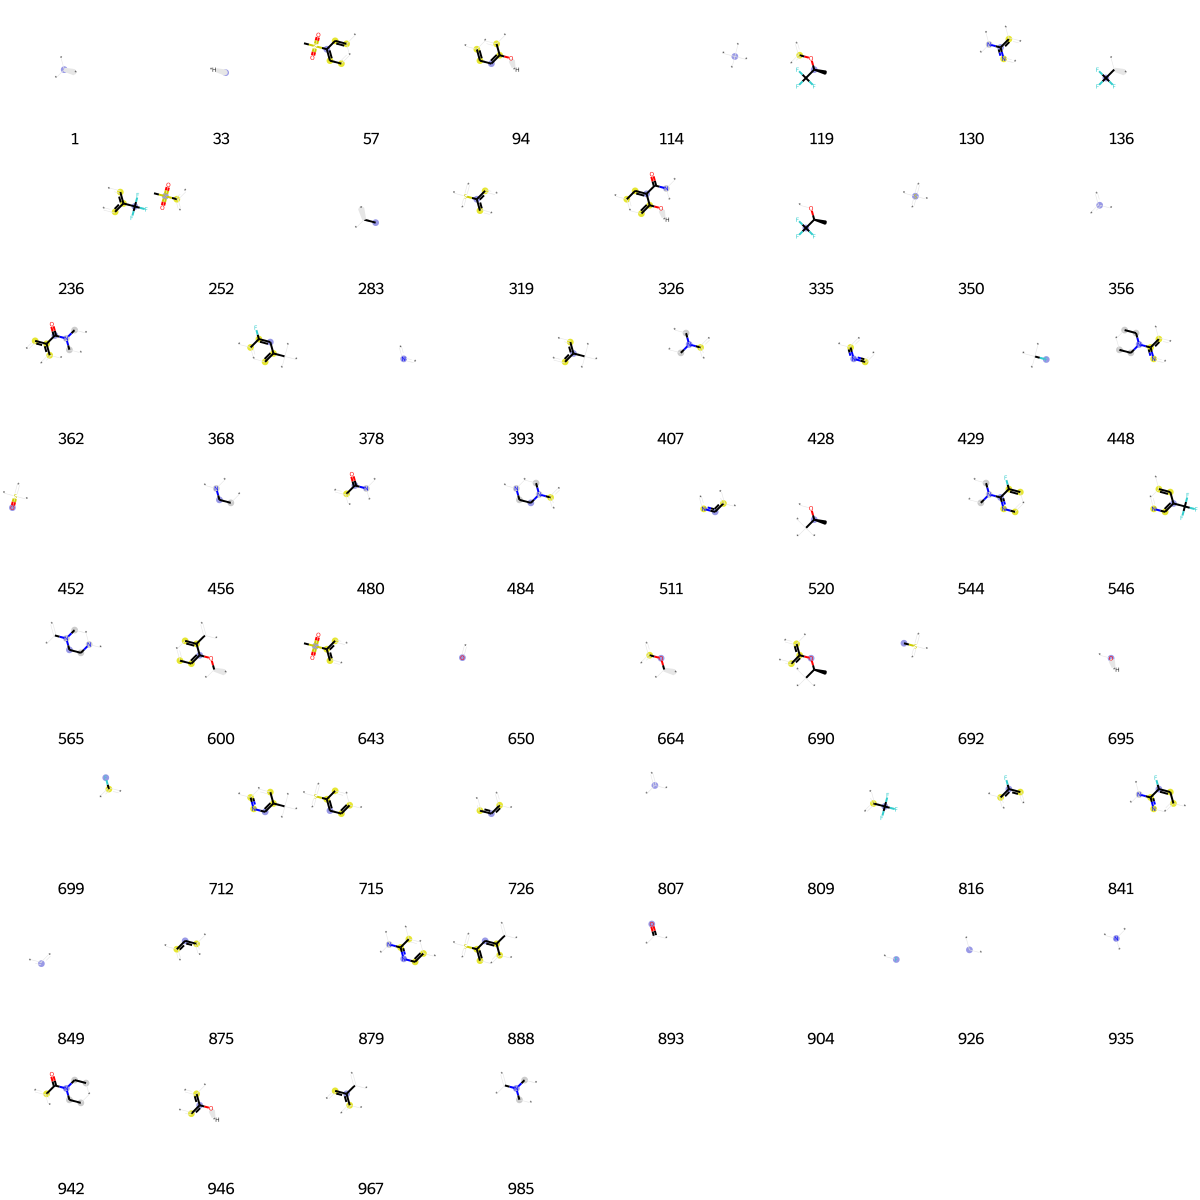

In [1358]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [1359]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[21,
 33,
 41,
 64,
 80,
 117,
 128,
 136,
 175,
 179,
 248,
 294,
 307,
 319,
 323,
 331,
 342,
 350,
 356,
 361,
 378,
 389,
 452,
 461,
 471,
 476,
 502,
 518,
 624,
 650,
 656,
 698,
 715,
 722,
 723,
 726,
 736,
 807,
 835,
 849,
 883,
 893,
 896,
 898]

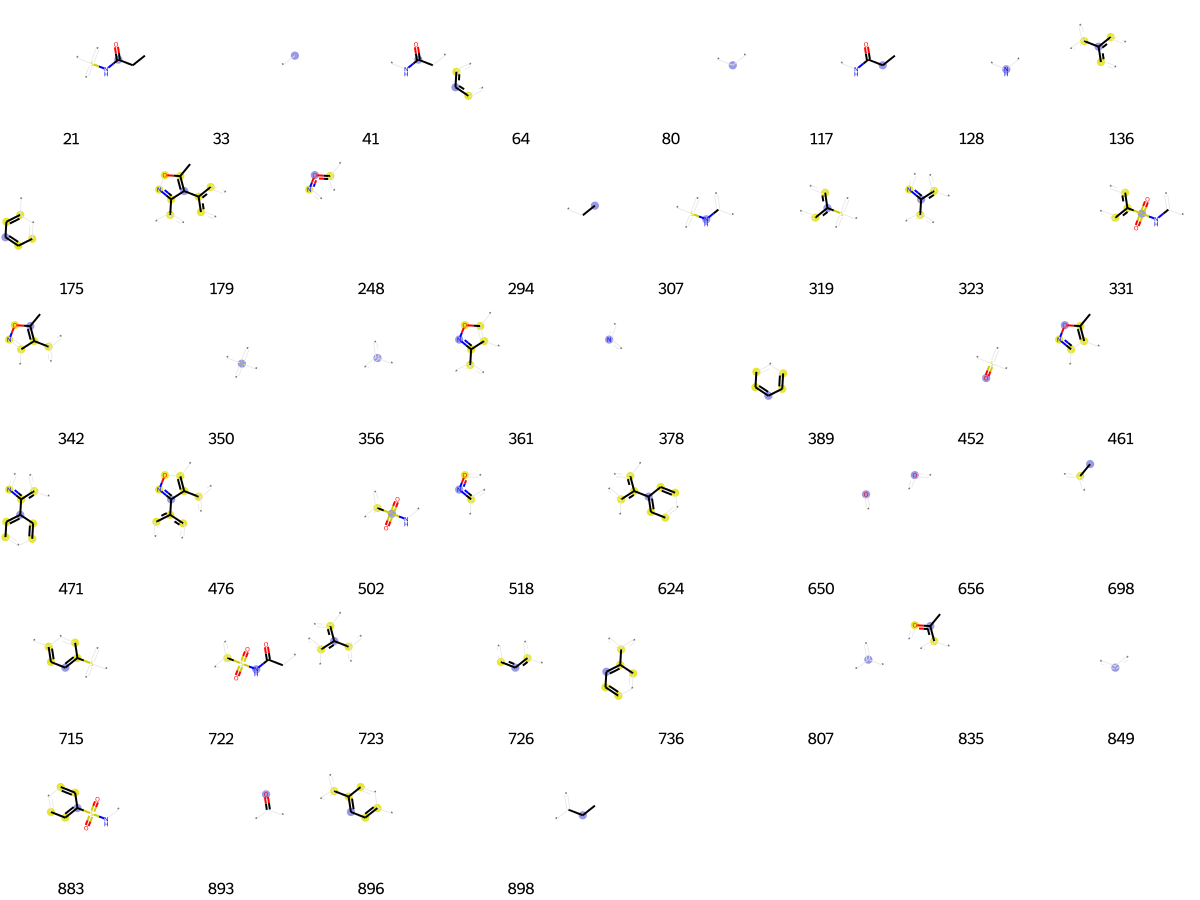

In [1360]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [1361]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[27,
 41,
 53,
 63,
 64,
 80,
 102,
 114,
 128,
 136,
 147,
 175,
 181,
 191,
 203,
 204,
 233,
 304,
 305,
 319,
 333,
 356,
 368,
 375,
 378,
 410,
 416,
 429,
 503,
 549,
 641,
 650,
 668,
 709,
 726,
 753,
 792,
 801,
 807,
 809,
 828,
 831,
 836,
 843,
 849,
 875,
 893,
 896,
 901,
 904,
 932,
 935,
 981]

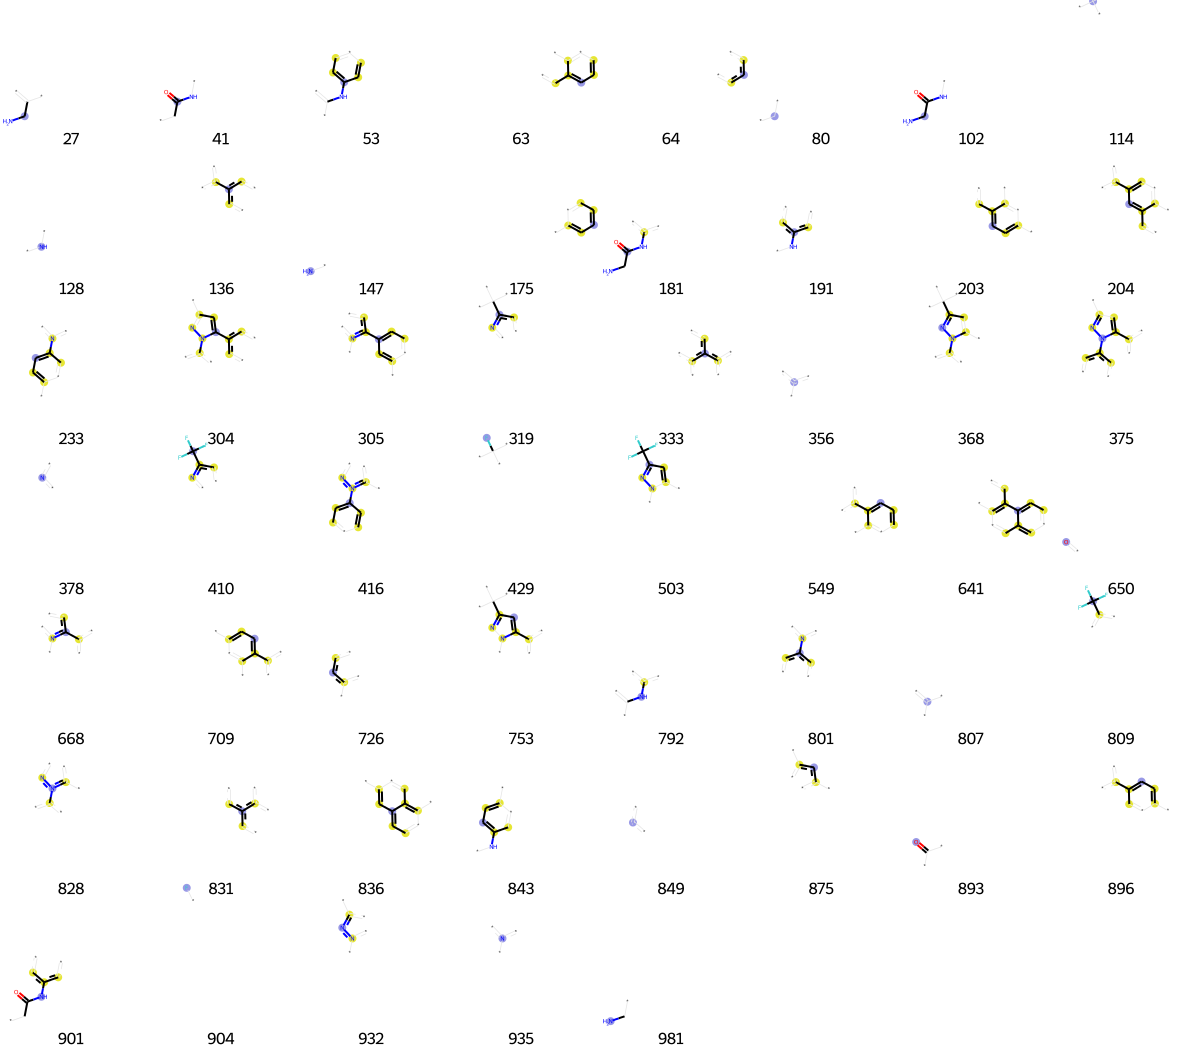

In [1362]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [1363]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[15,
 62,
 64,
 80,
 97,
 110,
 128,
 184,
 191,
 197,
 235,
 257,
 338,
 356,
 412,
 581,
 592,
 667,
 674,
 703,
 718,
 725,
 726,
 730,
 792,
 807,
 830,
 849,
 852,
 875,
 887,
 914,
 936,
 966,
 968]

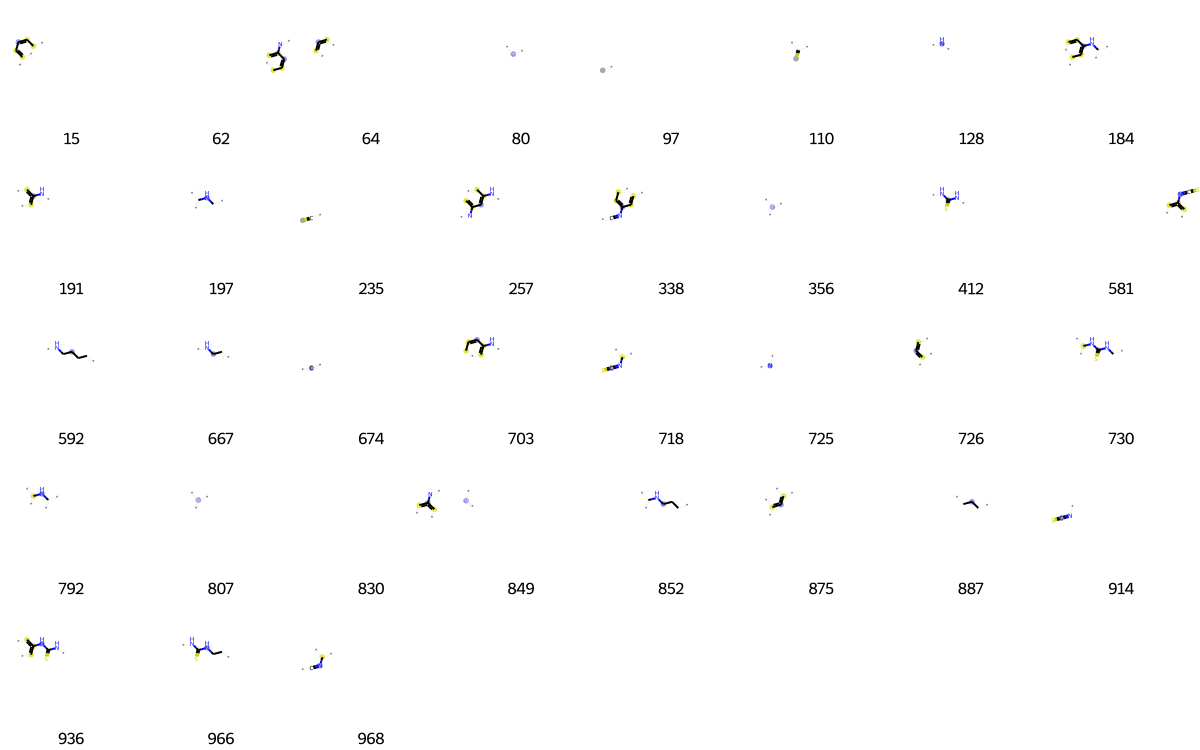

In [1364]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1365]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[25,
 167,
 315,
 356,
 451,
 452,
 578,
 583,
 584,
 589,
 694,
 695,
 711,
 726,
 745,
 807,
 835,
 849,
 875,
 959,
 1009,
 1017]

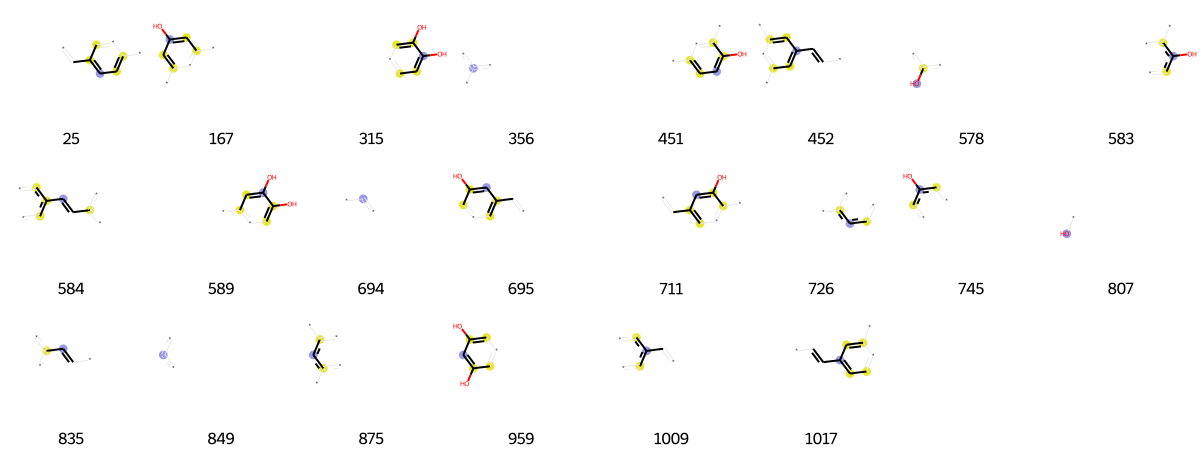

In [1366]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [1367]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[29,
 33,
 42,
 45,
 64,
 80,
 152,
 175,
 196,
 212,
 221,
 231,
 237,
 249,
 276,
 301,
 314,
 333,
 352,
 354,
 356,
 389,
 405,
 456,
 512,
 587,
 643,
 649,
 650,
 659,
 695,
 726,
 730,
 741,
 747,
 767,
 784,
 800,
 841,
 849,
 856,
 875,
 923,
 926,
 935,
 946,
 1019]

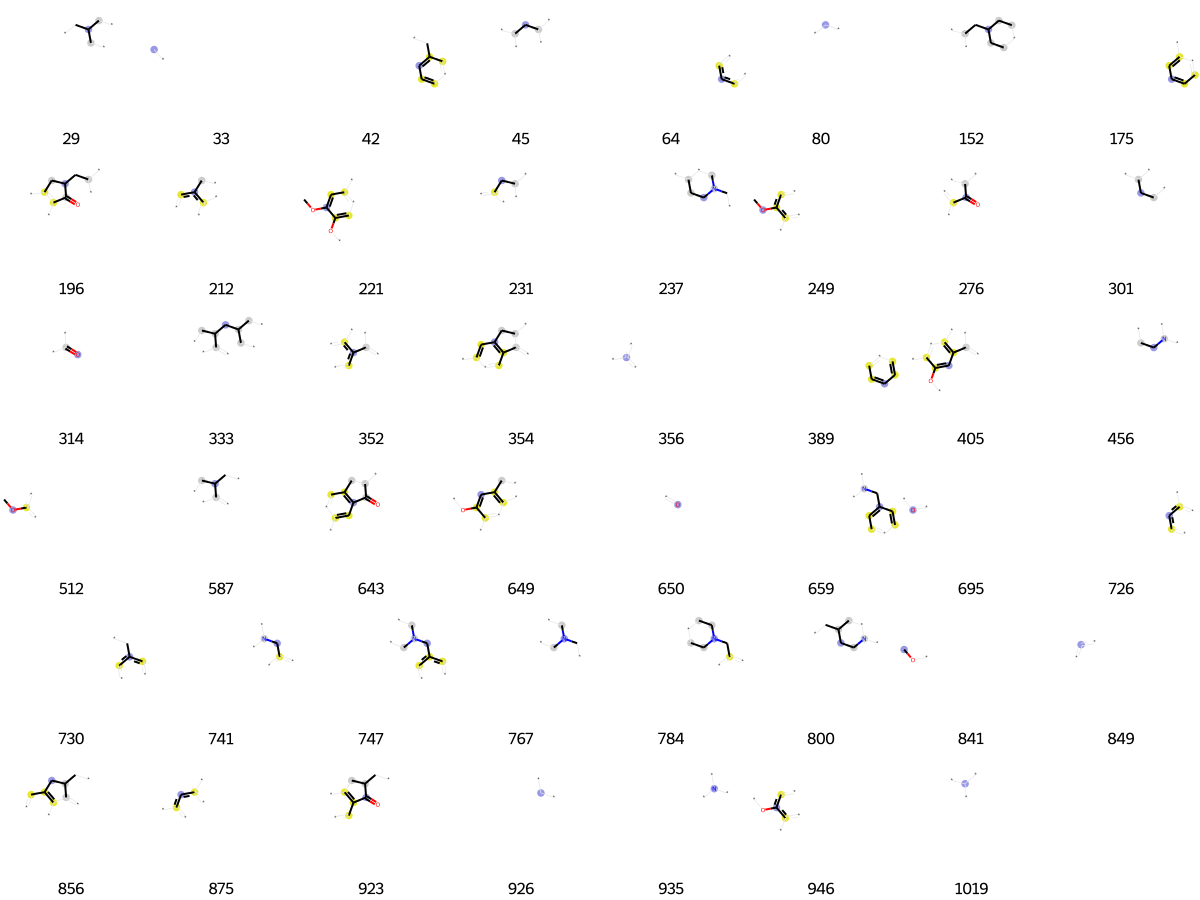

In [1368]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [1369]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[8,
 33,
 41,
 72,
 80,
 119,
 128,
 139,
 197,
 238,
 243,
 265,
 355,
 356,
 361,
 486,
 540,
 592,
 607,
 641,
 650,
 667,
 673,
 676,
 694,
 726,
 737,
 807,
 849,
 852,
 878,
 881,
 887,
 893,
 955,
 960]

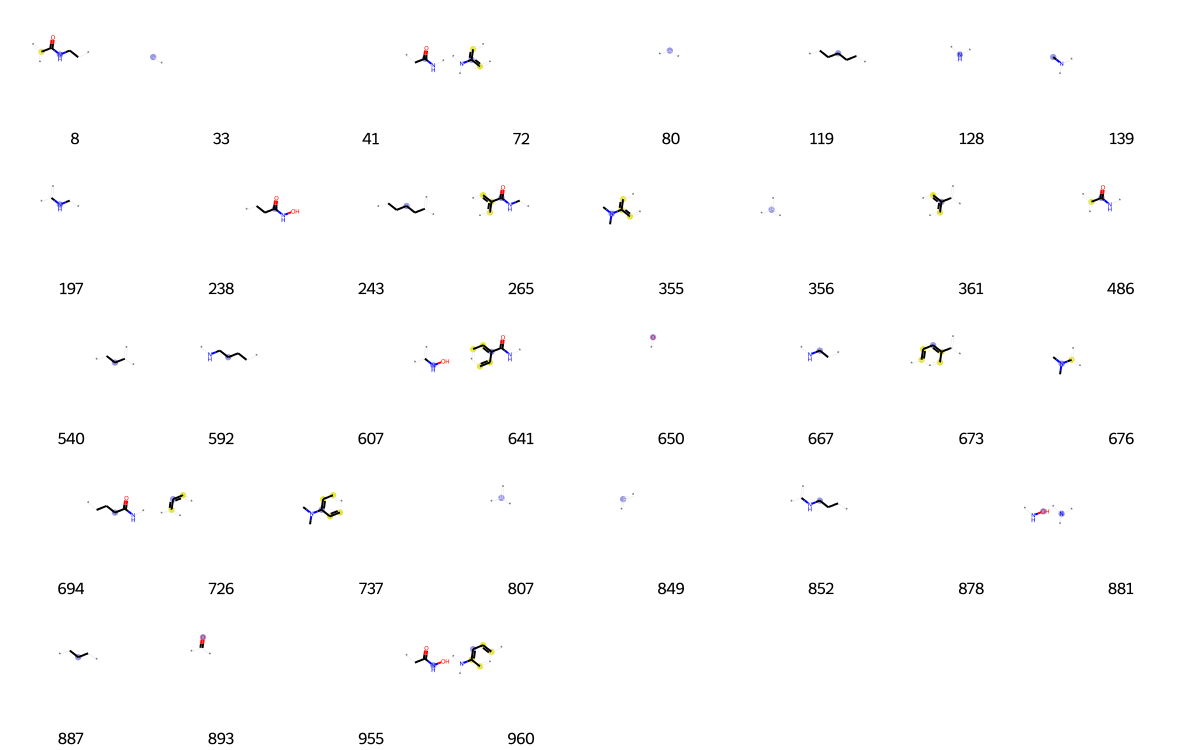

In [1370]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1371]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 3,
 33,
 40,
 43,
 62,
 64,
 73,
 136,
 175,
 194,
 207,
 247,
 257,
 283,
 289,
 322,
 333,
 352,
 356,
 378,
 409,
 428,
 463,
 464,
 487,
 511,
 549,
 555,
 613,
 629,
 664,
 672,
 695,
 711,
 716,
 718,
 726,
 787,
 842,
 849,
 896,
 905,
 927,
 935,
 940,
 954,
 968]

In [1372]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[25,
 42,
 55,
 64,
 80,
 128,
 175,
 179,
 186,
 197,
 248,
 255,
 315,
 356,
 360,
 389,
 451,
 499,
 549,
 556,
 578,
 583,
 589,
 638,
 650,
 674,
 677,
 694,
 711,
 722,
 726,
 730,
 790,
 803,
 807,
 849,
 875,
 893,
 945,
 1009]

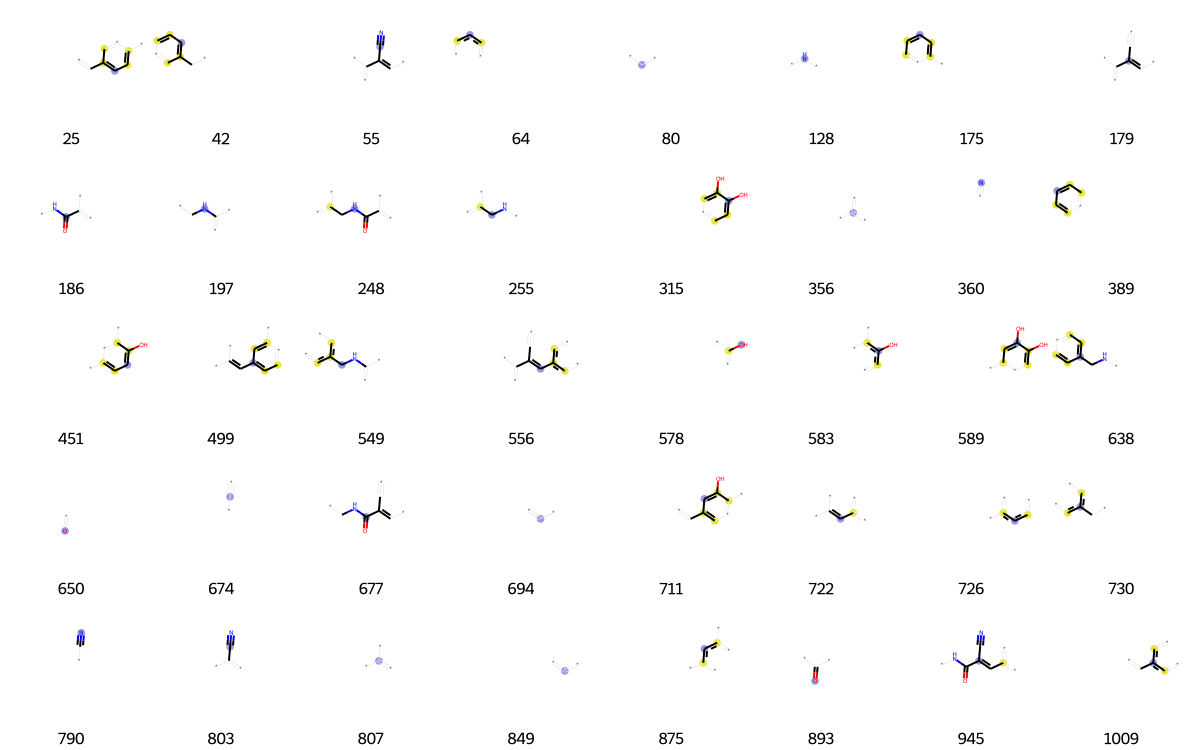

In [1373]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1374]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[25,
 31,
 77,
 80,
 284,
 310,
 349,
 356,
 378,
 389,
 401,
 439,
 494,
 508,
 514,
 579,
 630,
 650,
 659,
 694,
 702,
 726,
 730,
 741,
 790,
 807,
 835,
 842,
 843,
 849,
 878,
 893,
 932,
 935,
 970,
 976,
 1009]

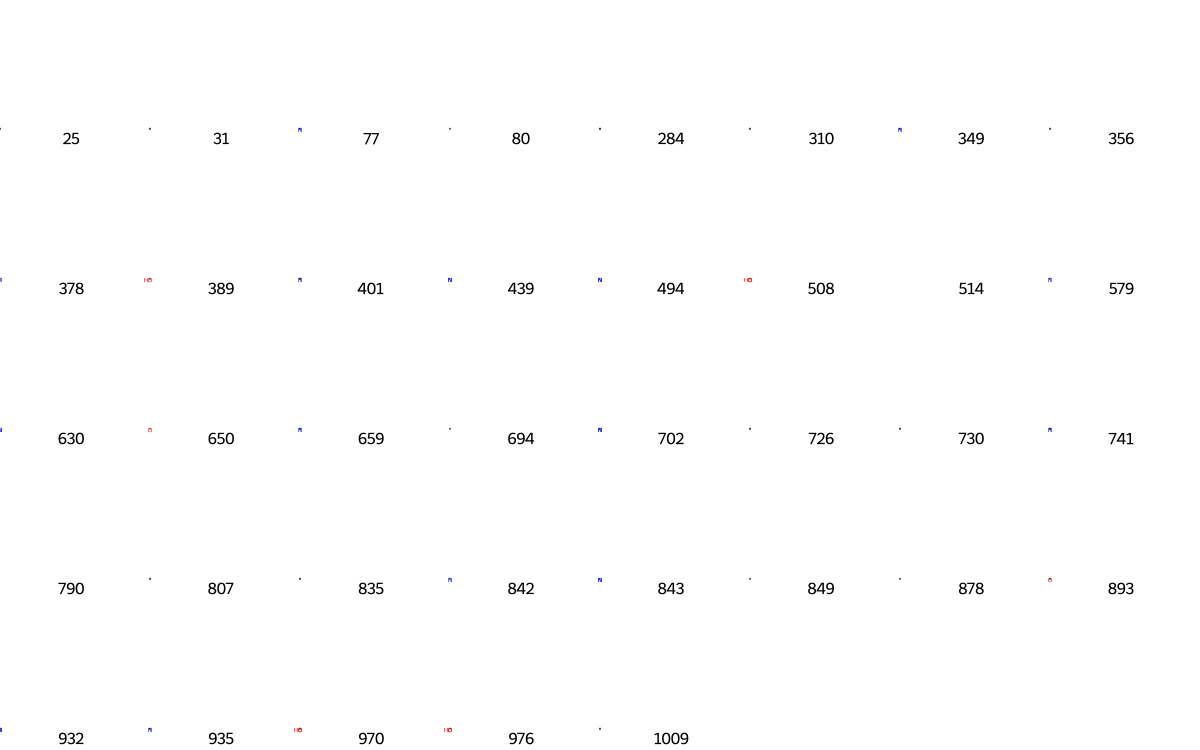

In [1375]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [1376]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[50,
 64,
 106,
 136,
 147,
 175,
 216,
 323,
 356,
 378,
 389,
 407,
 409,
 433,
 434,
 471,
 578,
 607,
 676,
 726,
 728,
 736,
 766,
 807,
 831,
 849,
 867]

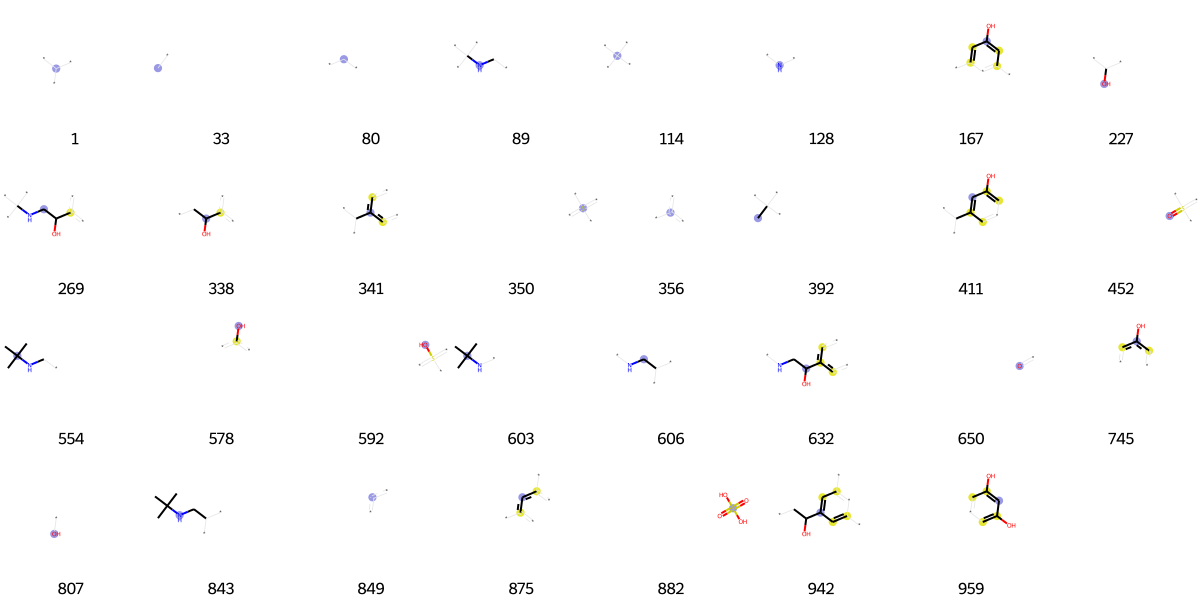

In [1377]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [1378]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[33,
 36,
 64,
 80,
 90,
 96,
 107,
 142,
 175,
 217,
 219,
 252,
 263,
 281,
 314,
 352,
 356,
 388,
 389,
 446,
 452,
 527,
 540,
 556,
 590,
 624,
 633,
 650,
 660,
 692,
 694,
 698,
 713,
 721,
 726,
 807,
 840,
 849,
 857,
 874,
 893,
 958,
 984,
 1010]

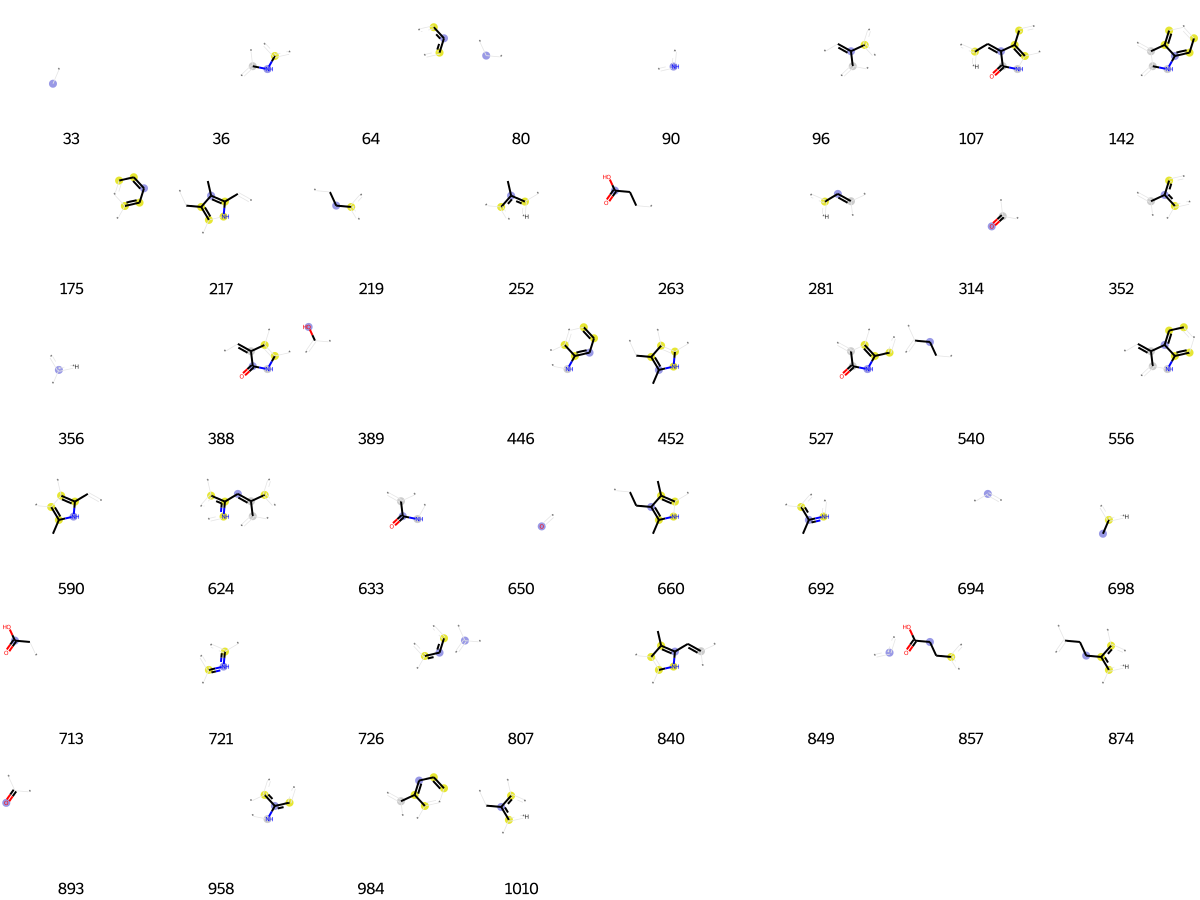

In [1379]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [1380]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[1,
 4,
 10,
 33,
 42,
 80,
 90,
 109,
 115,
 117,
 128,
 130,
 140,
 143,
 147,
 173,
 193,
 197,
 242,
 253,
 283,
 294,
 300,
 301,
 310,
 314,
 322,
 354,
 355,
 356,
 362,
 392,
 416,
 432,
 435,
 446,
 456,
 458,
 482,
 492,
 503,
 511,
 512,
 519,
 520,
 531,
 540,
 545,
 551,
 559,
 573,
 597,
 616,
 624,
 626,
 650,
 665,
 669,
 675,
 680,
 684,
 689,
 694,
 695,
 712,
 714,
 718,
 719,
 726,
 730,
 736,
 759,
 767,
 781,
 789,
 798,
 804,
 807,
 823,
 828,
 831,
 832,
 837,
 841,
 846,
 848,
 849,
 874,
 893,
 926,
 931,
 935,
 957,
 1004,
 1019]

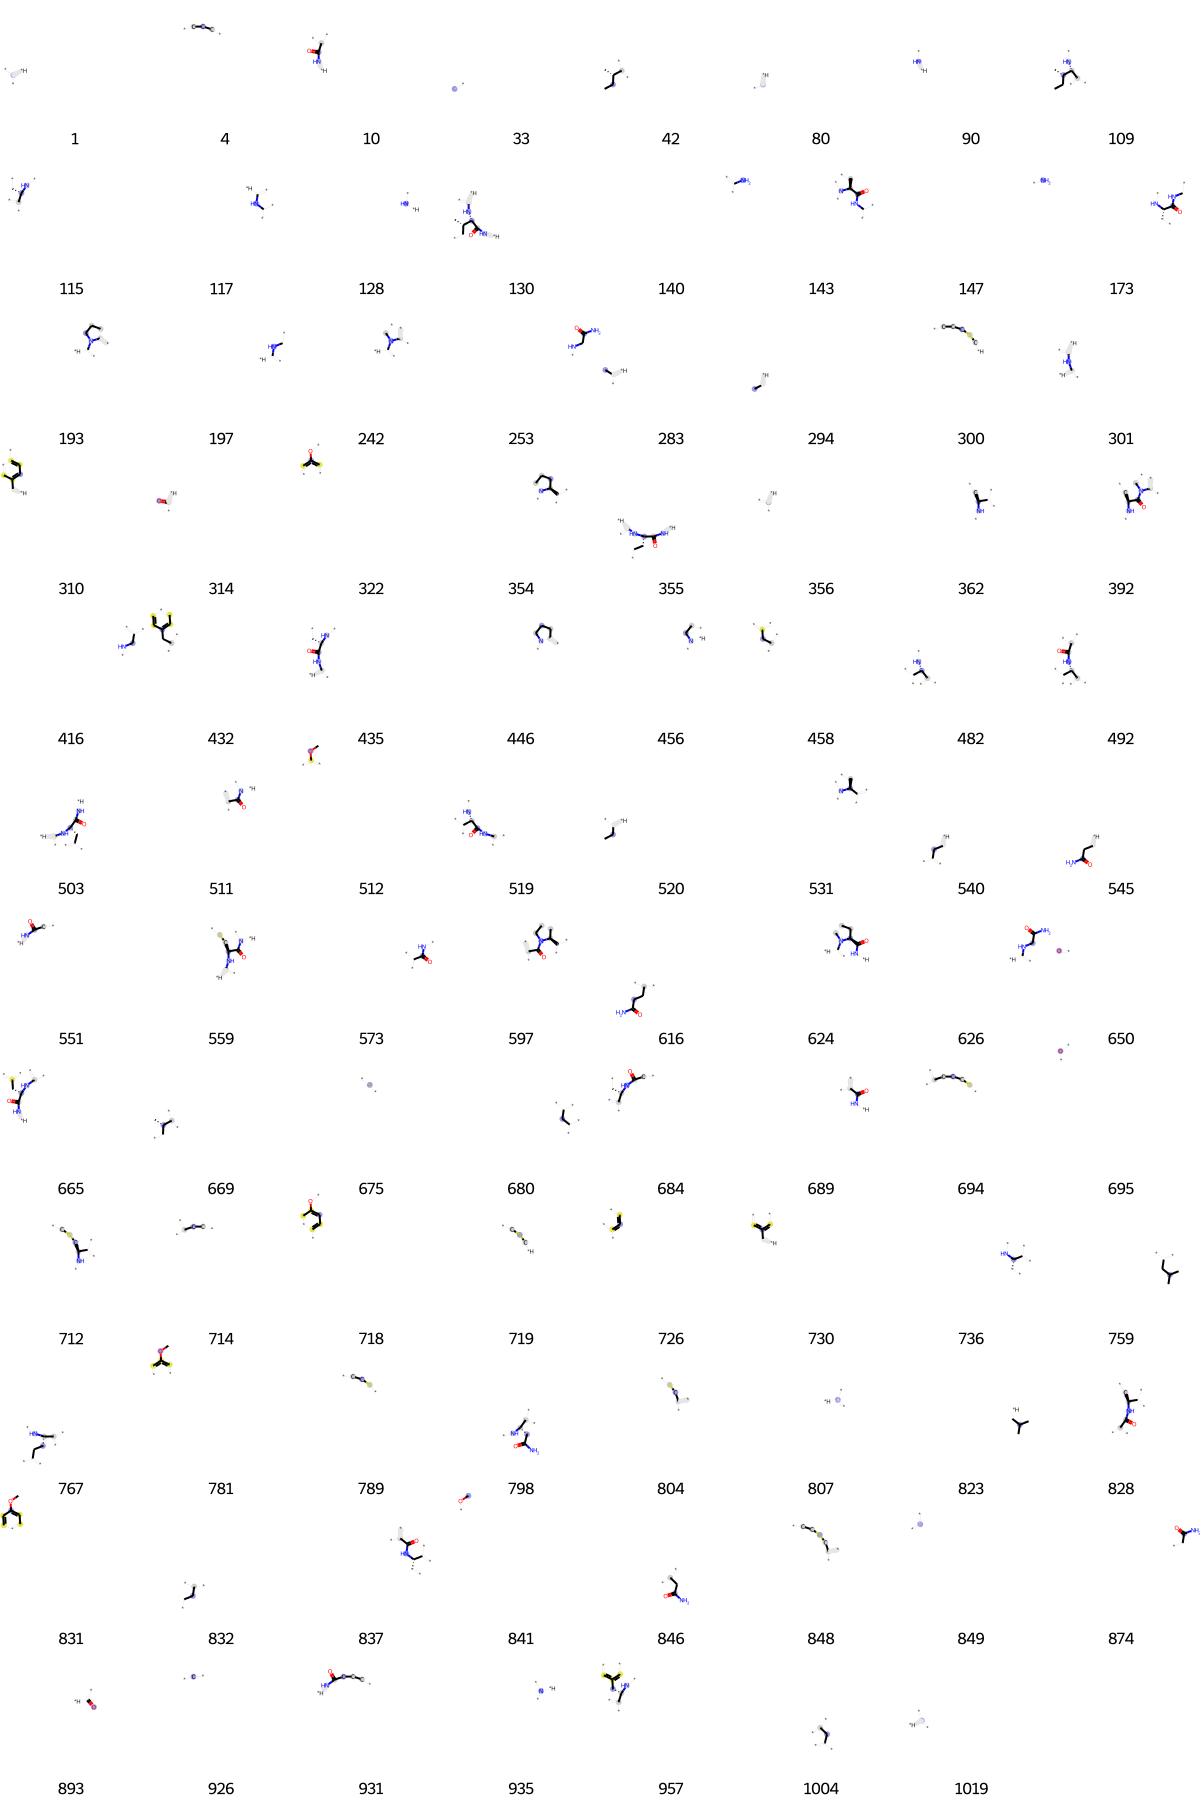

In [1381]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [1382]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[8,
 11,
 14,
 33,
 36,
 59,
 64,
 77,
 83,
 90,
 102,
 121,
 202,
 207,
 212,
 215,
 225,
 233,
 250,
 252,
 258,
 260,
 270,
 272,
 284,
 285,
 297,
 314,
 328,
 350,
 356,
 376,
 402,
 410,
 456,
 462,
 463,
 489,
 521,
 527,
 529,
 551,
 564,
 566,
 574,
 578,
 590,
 594,
 610,
 633,
 637,
 650,
 656,
 660,
 694,
 695,
 698,
 707,
 723,
 725,
 740,
 744,
 756,
 772,
 781,
 801,
 807,
 841,
 847,
 849,
 861,
 862,
 864,
 884,
 893,
 911,
 913,
 926,
 932,
 933,
 935,
 937,
 945,
 960,
 966,
 995,
 1017,
 1019,
 1021]

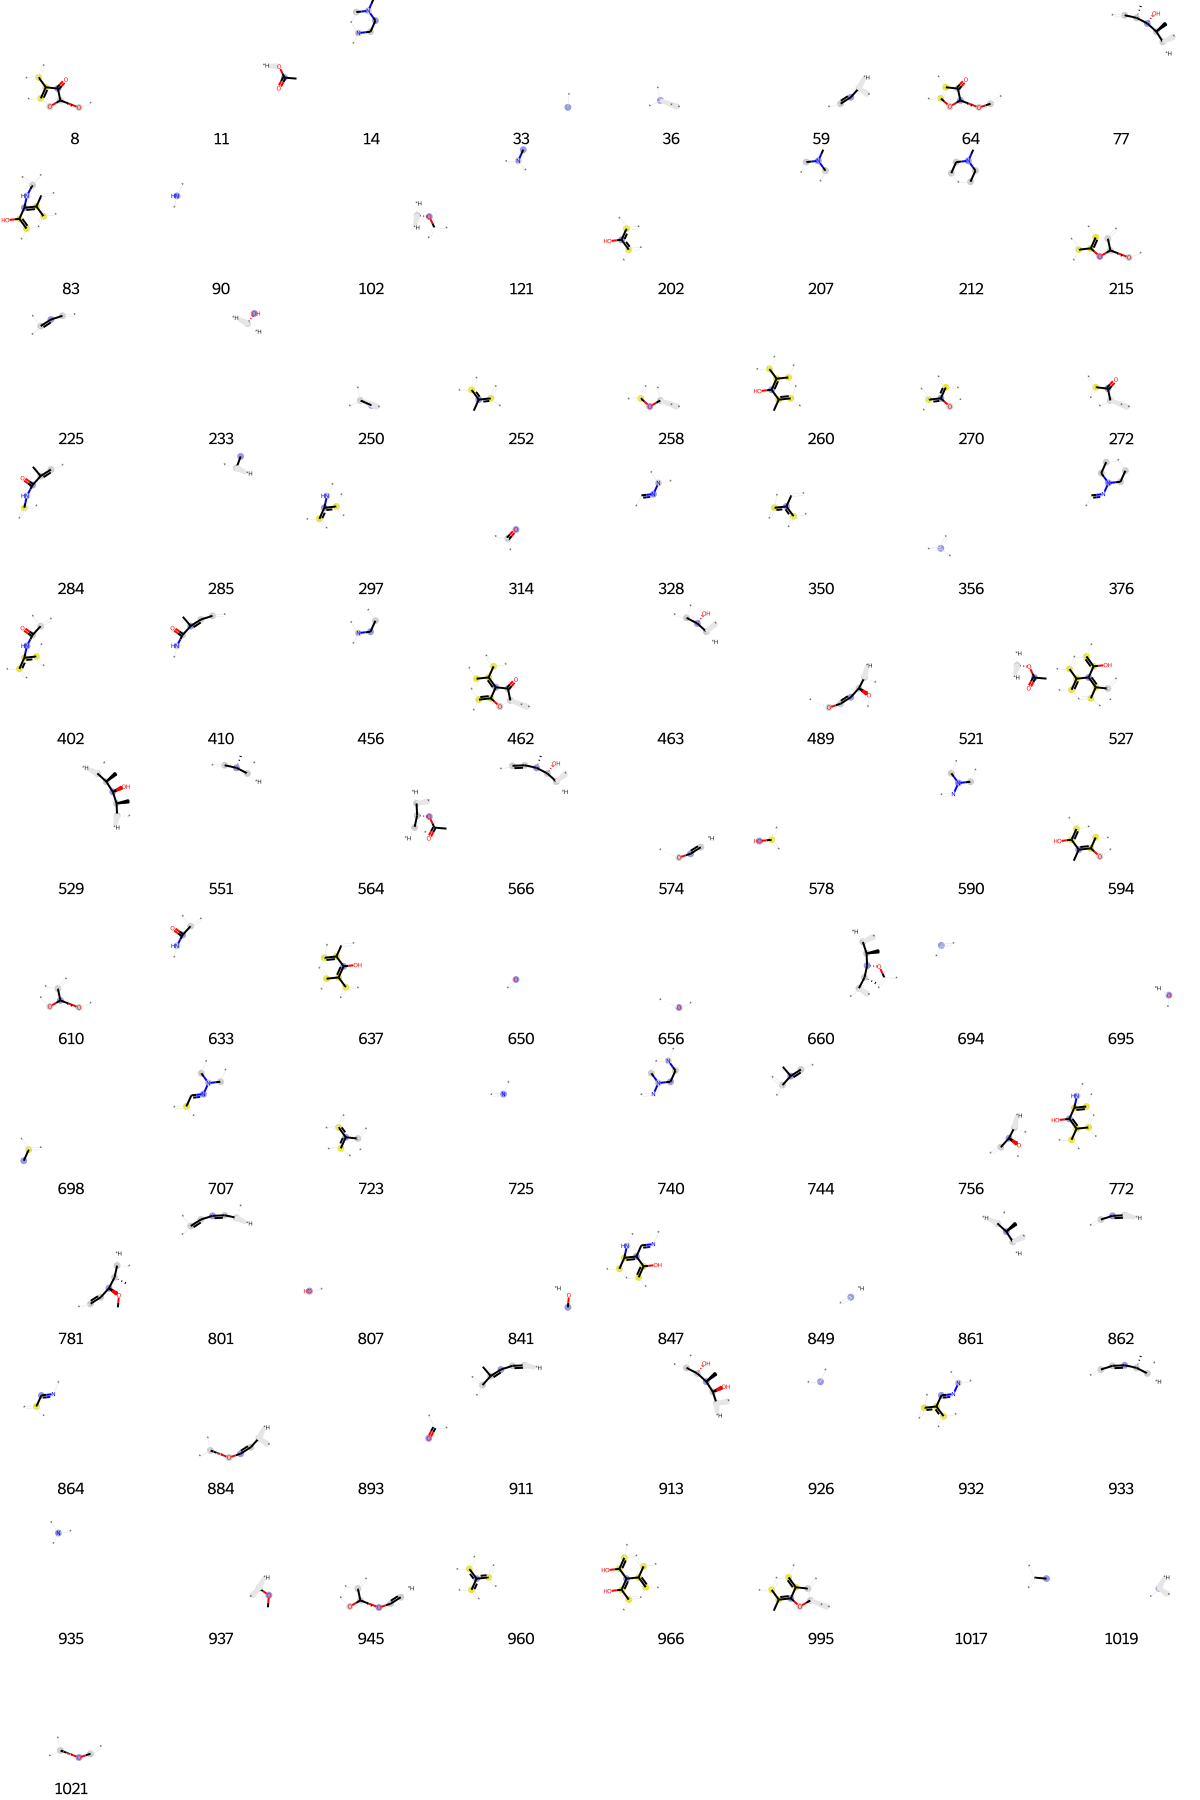

In [1383]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [1384]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[6,
 33,
 41,
 42,
 62,
 64,
 73,
 80,
 94,
 95,
 97,
 110,
 121,
 128,
 131,
 162,
 167,
 175,
 184,
 191,
 325,
 343,
 356,
 378,
 383,
 389,
 412,
 428,
 464,
 550,
 576,
 593,
 613,
 631,
 647,
 650,
 654,
 663,
 675,
 695,
 699,
 726,
 730,
 768,
 787,
 792,
 807,
 816,
 824,
 841,
 842,
 843,
 849,
 854,
 875,
 893,
 894,
 904,
 913,
 921,
 932,
 935,
 936,
 946,
 950,
 980,
 1009]

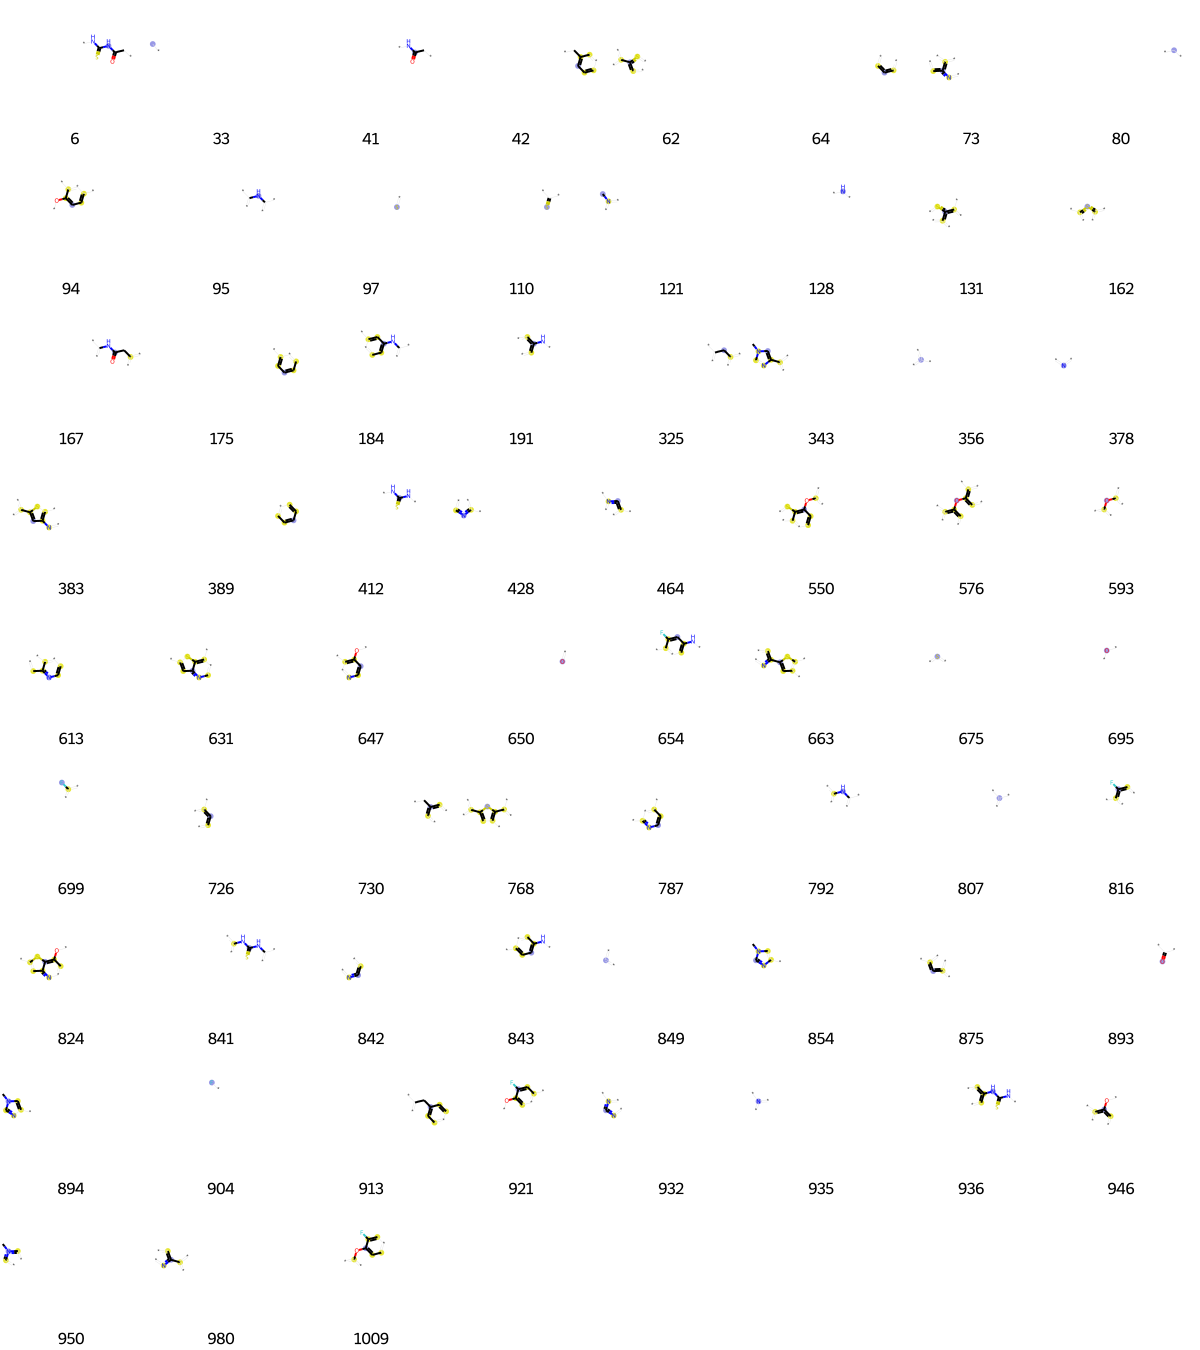

In [1385]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [1386]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[4,
 356,
 361,
 366,
 367,
 371,
 451,
 491,
 561,
 576,
 578,
 583,
 605,
 659,
 666,
 714,
 726,
 807,
 849,
 892,
 926]

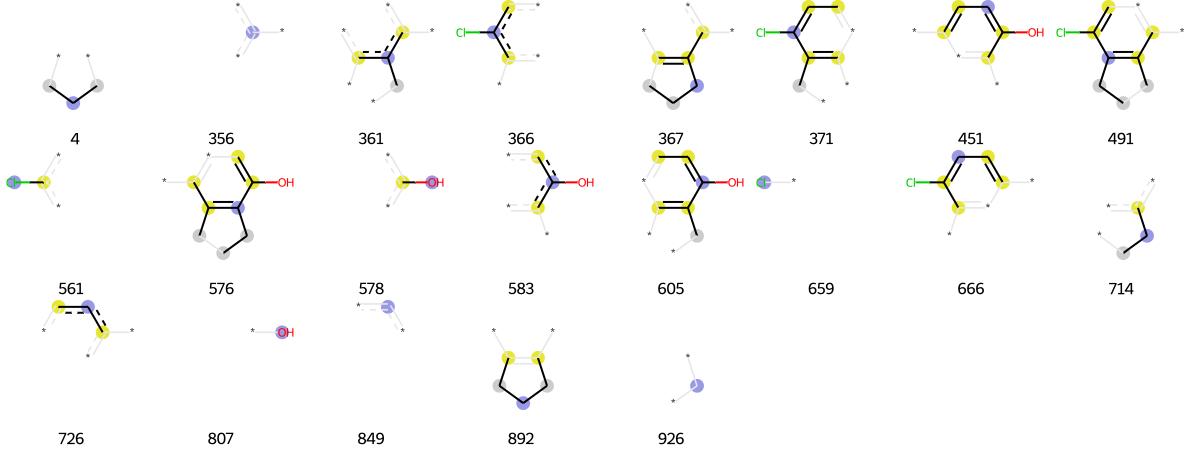

In [1387]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [1388]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[15,
 33,
 64,
 72,
 80,
 90,
 121,
 128,
 136,
 144,
 150,
 207,
 212,
 252,
 271,
 272,
 294,
 300,
 301,
 307,
 319,
 323,
 333,
 338,
 350,
 352,
 356,
 378,
 387,
 428,
 452,
 456,
 486,
 503,
 506,
 511,
 519,
 534,
 537,
 573,
 575,
 589,
 610,
 631,
 632,
 650,
 667,
 698,
 721,
 726,
 736,
 744,
 799,
 802,
 807,
 849,
 852,
 875,
 893,
 917,
 926,
 935,
 960,
 967,
 993,
 1019]

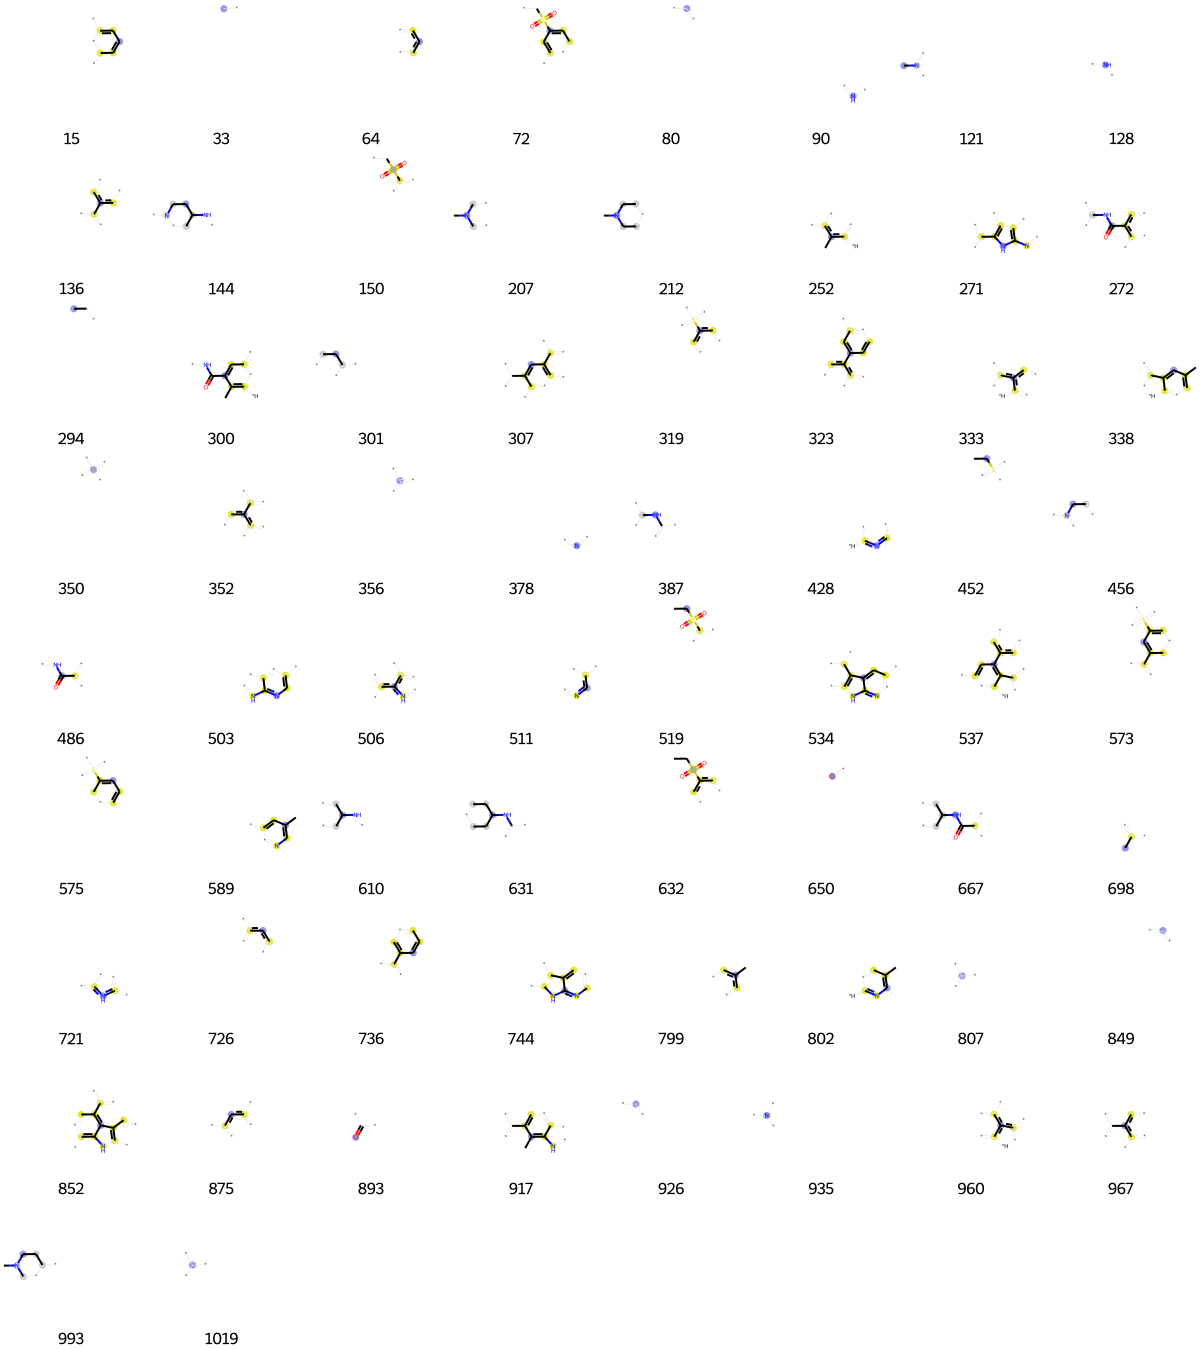

In [1389]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [1390]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[33,
 80,
 114,
 165,
 185,
 216,
 325,
 350,
 356,
 366,
 392,
 393,
 406,
 434,
 451,
 513,
 527,
 548,
 561,
 570,
 578,
 583,
 630,
 641,
 659,
 682,
 706,
 717,
 726,
 733,
 807,
 816,
 849,
 875,
 883,
 965,
 997]

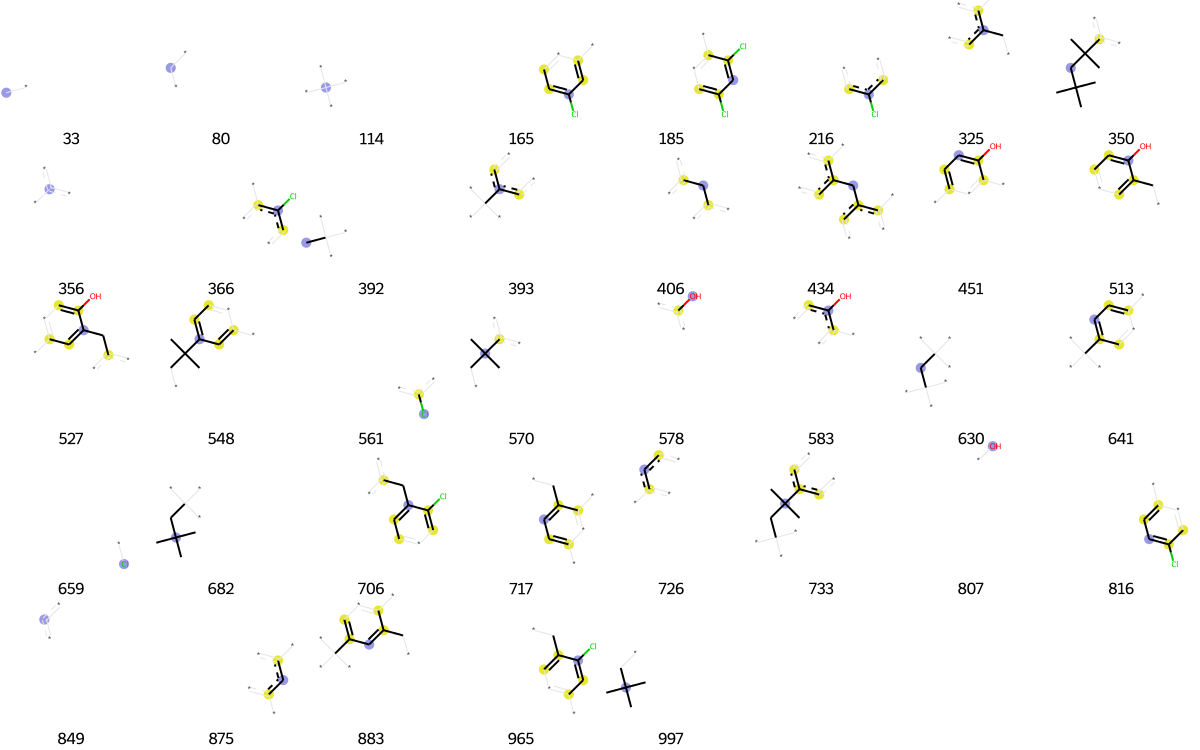

In [1391]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [1392]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[33,
 77,
 81,
 90,
 114,
 128,
 136,
 163,
 187,
 191,
 192,
 203,
 204,
 246,
 270,
 296,
 314,
 315,
 322,
 323,
 333,
 350,
 352,
 356,
 380,
 391,
 392,
 409,
 419,
 439,
 452,
 512,
 535,
 564,
 575,
 587,
 650,
 692,
 695,
 721,
 726,
 744,
 758,
 801,
 824,
 831,
 841,
 843,
 849,
 875,
 896,
 900,
 934,
 935,
 956,
 976]

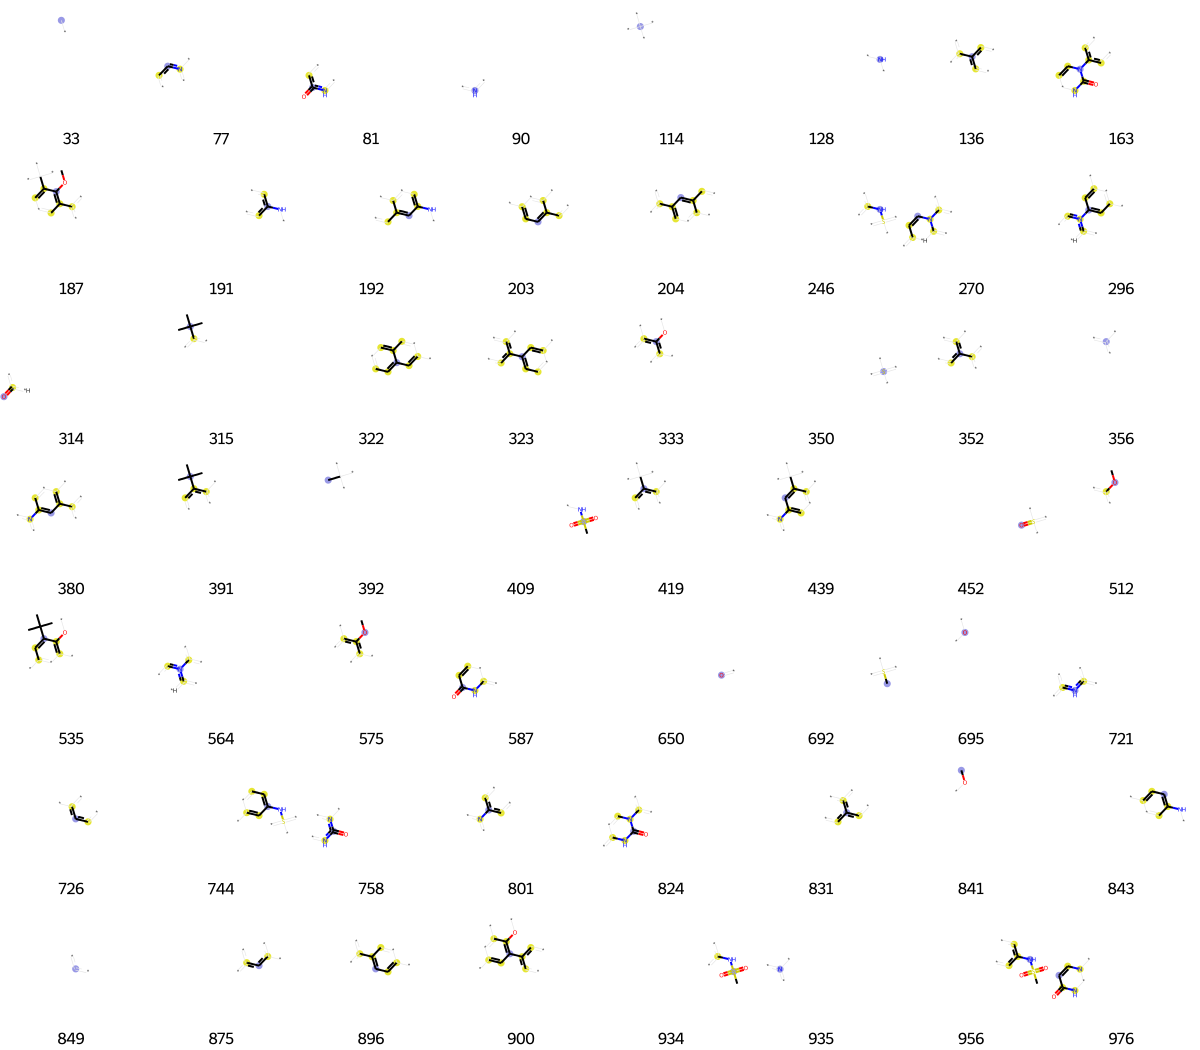

In [1393]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [1394]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[33,
 34,
 65,
 76,
 80,
 96,
 105,
 117,
 128,
 151,
 158,
 202,
 216,
 244,
 270,
 285,
 289,
 294,
 310,
 314,
 345,
 356,
 358,
 366,
 378,
 406,
 416,
 428,
 463,
 464,
 465,
 486,
 490,
 504,
 512,
 561,
 578,
 592,
 650,
 659,
 699,
 714,
 726,
 730,
 734,
 739,
 741,
 744,
 807,
 816,
 849,
 867,
 875,
 879,
 882,
 893,
 904,
 908,
 926,
 930,
 932,
 935,
 950,
 960,
 1017,
 1019]

In [1395]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[1,
 33,
 61,
 80,
 189,
 202,
 204,
 206,
 221,
 226,
 227,
 231,
 233,
 259,
 268,
 292,
 294,
 356,
 401,
 420,
 510,
 540,
 551,
 575,
 591,
 600,
 601,
 622,
 628,
 637,
 650,
 656,
 694,
 715,
 717,
 735,
 739,
 750,
 770,
 782,
 785,
 794,
 795,
 807,
 814,
 849,
 885,
 887,
 893,
 926,
 1019]

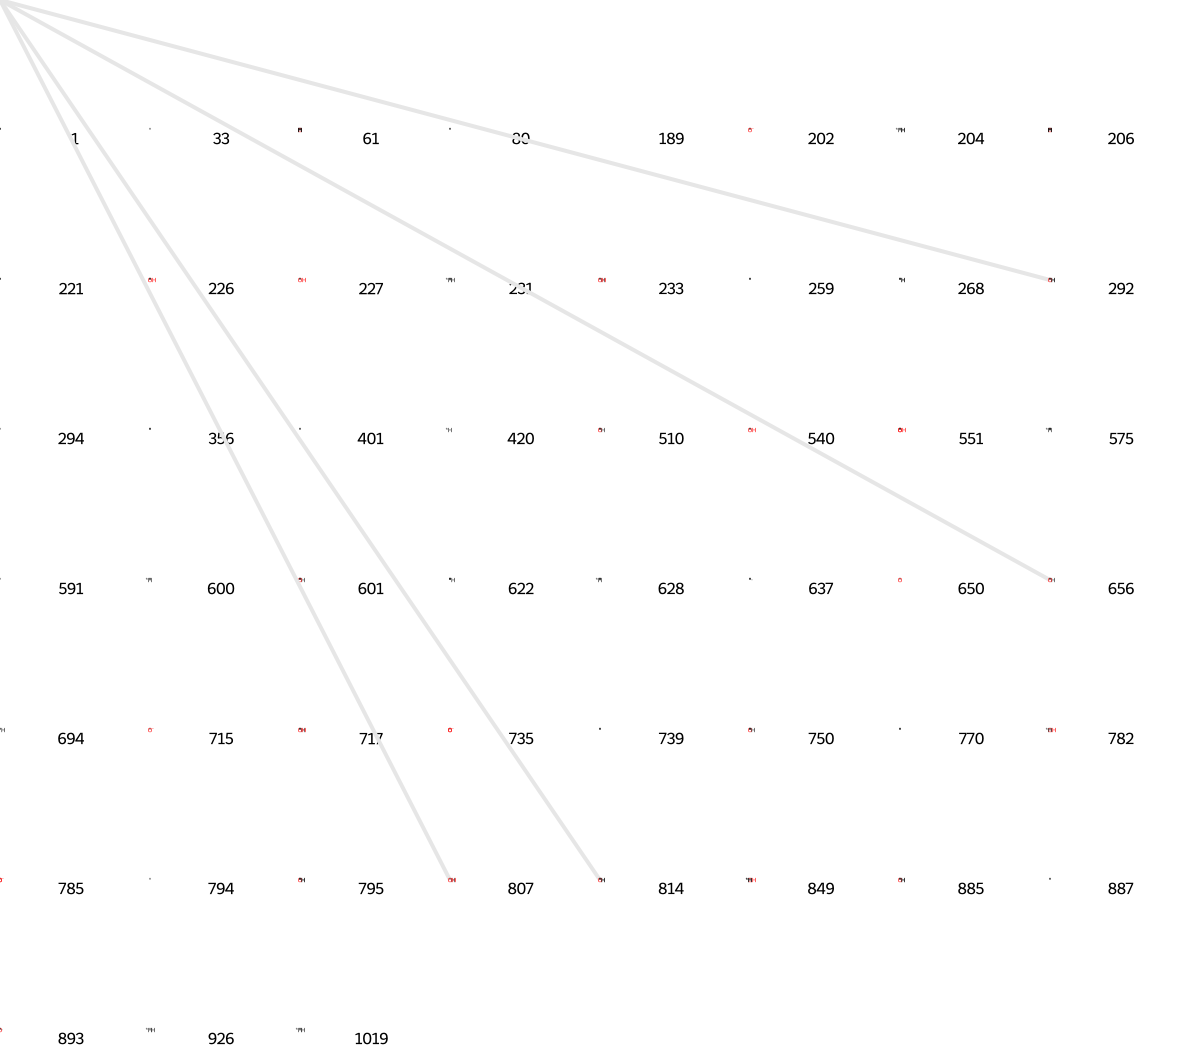

In [1396]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [1397]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[3,
 15,
 25,
 42,
 64,
 80,
 90,
 102,
 107,
 113,
 143,
 170,
 230,
 271,
 273,
 281,
 310,
 314,
 322,
 356,
 386,
 428,
 445,
 475,
 484,
 541,
 575,
 588,
 646,
 650,
 654,
 659,
 667,
 675,
 694,
 695,
 699,
 718,
 726,
 730,
 741,
 745,
 749,
 807,
 831,
 849,
 863,
 875,
 879,
 904,
 935,
 943,
 947,
 1003,
 1009,
 1020]

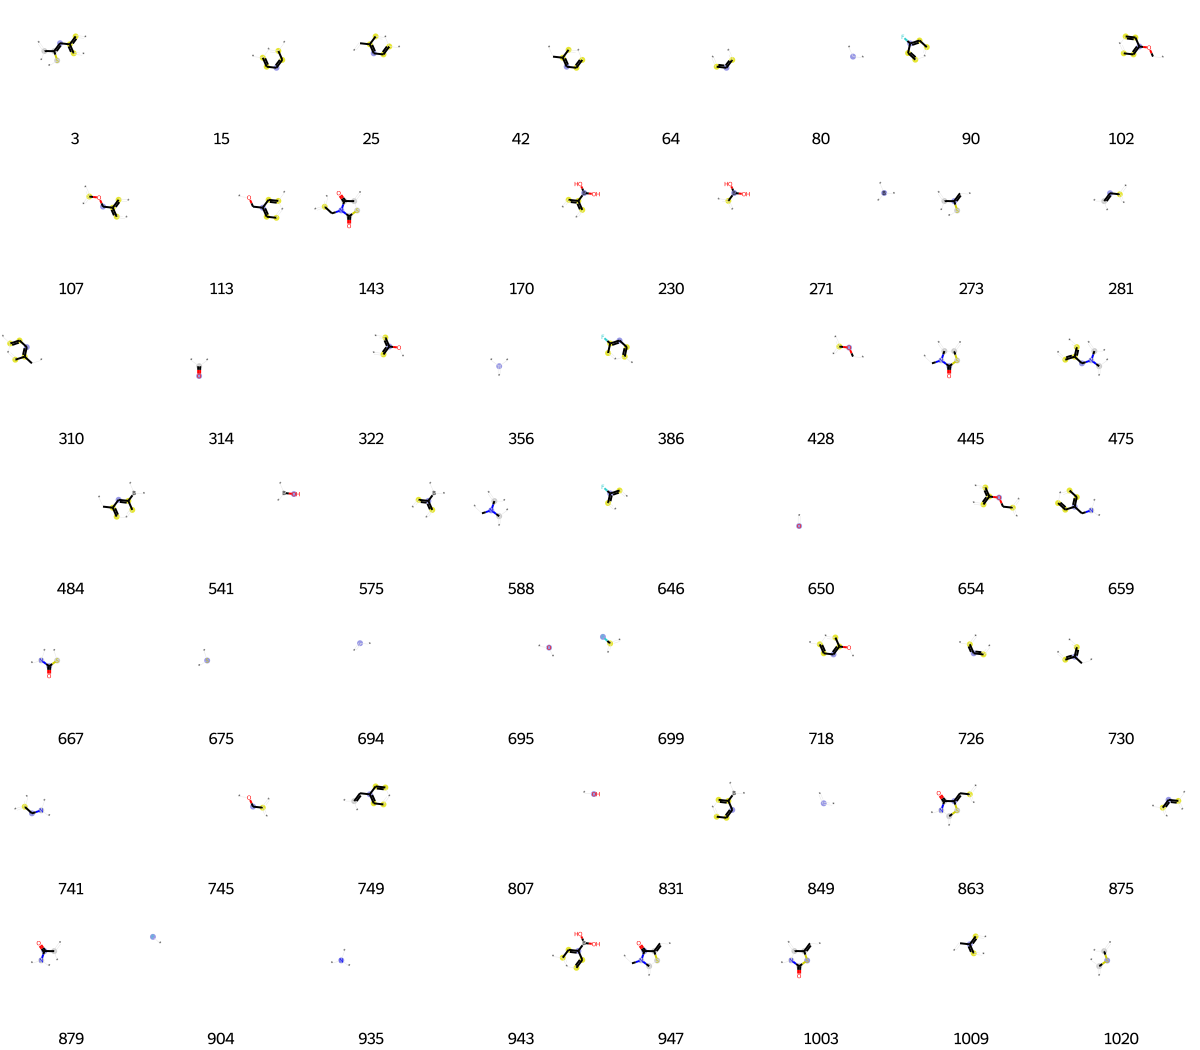

In [1398]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])